#### Comparison with other method

In [1]:
#from two_layer_bidirectionnal import graph3,graph4
#from Specialist_layer import graph as graph7
from Specialist_layer import return_three_layer,return_three_bis,return_two_layer,return_three_bis_simpler



Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [25]:
from Specialist_layer import return_layer_paper
graph = return_layer_paper(n_layers=4,simple=False)
graph.load_weights("../cluster_theano/weight-folder/4layer-LSTM_7_140")


Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.
v1
v1


In [24]:
from Specialist_layer import return_four_paper

def load_weights_old(graph, filepath):
    '''Load weights from a HDF5 file.
    '''
    import h5py
    f = h5py.File(filepath, mode='r')
    g = f['graph']
    weights = [g['param_{}'.format(p)] for p in range(g.attrs['nb_params'])]
    start = 0
    
    for nl,l in enumerate(graph.layers):
        p = l.trainable_weights + l.non_trainable_weights
        #print p
        if len(p) > 0:
            graph.layers[nl].set_weights(weights[start:start+len(p)])
        start += len(p)
    f.close()

graph4p = return_four_paper(ndim=2,inside = 50,permutation=True,inputsize=5)
load_weights_old(graph4p,"saved_weights/paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_0p25_12_18")

In [44]:
graph4pb = return_four_paper(ndim=2,inside = 50,permutation=True,inputsize=7)
graph4pb.load_weights("paper_sub_simple_more_input_6_0")
graph4pb.load_weights("paper_sub_simple_more_input_6_54")

In [39]:
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_2_12")

In [43]:
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_16_138")

In [40]:
from Specialist_layer import return_three_paper
graphp = return_three_paper(ndim=2,inside=50,permutation=True,inputsize=5)

In [84]:
graphs = return_three_paper(ndim=2,inside=4*50,permutation=True,inputsize=5,simple=True)

In [15]:
from Specialist_layer import return_three_paper
graph3p = return_three_paper(ndim=2,inside=50,permutation=True,inputsize=5+8)

Using Theano backend.
Using gpu device 0: GeForce GTX 660 (CNMeM is disabled, cuDNN not available)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
graph4 =  return_three_bis_three_level(ndim=2)

In [9]:
grapho = old_but_ok()

In [48]:
graph10 =  return_three_bis_simpler()

In [3]:
graph8 = return_three_layer()
#graph7.load_weights("specialist_l3_40_diff_size_50")

In [17]:
graph9 = return_three_bis()

In [191]:
graph3D = return_three_bis(ndim=3)

In [198]:
#graph3D.load_weights("transition_dim3_6_96_diff_size_50")
graph3D.load_weights("saved_weights/three_bilayer_sub_bis_3D_anisotrope")
#transition_dim3_6_96_diff_size_50

In [91]:
#graph9.load_weights("saved_weights/temp_best2d")
graph9.load_weights("attemp_improve_2_12")
#graph9.load_weights("transition_dim2_6_72_diff_size_50")
#graph9.load_weights("transition_l8_2_24_diff_size_50")

In [2]:
graph7 = return_two_layer()
#graph8.load_weights("transition_7_2_diff_size_50")
#for layer in graph8.nodes.values()[:4]:
#    print layer.name
#    print [w.shape for w in layer.get_weights()]

#graph8.load_weights("tmp")
#from three_layer import graph as graph5
#graph4.load_weights("step_v3_2_diff_size_50")
#graph4.load_weights("step_v3_30_diff_size_50")
#graph4.save_weights("graph_3layer")

In [7]:
graph7.load_weights("specialist_l3_58_diff_size_50")
#specialist_l3_58_diff_size_50

In [344]:
graph2 =  return_three_bis_simpler(ndim=2,permute=False)

In [18]:
graph3 =  return_three_bis_simpler(ndim=3,permute=False)

In [71]:
#graph2.load_weights("pure_2_18")
graph3.load_weights("pure_3D_8_36")

In [26]:
def get_result(graph,Normed=[],three_l=True,fight=False):

    pred_RNN = []
    pred_RNN_cat = []
    for i in range(0,500,100):
        pred0 = graph.predict({"input1":np.array([t for t in Normed[i:i+100]])},batch_size=50)
        
        if three_l:
            pred0["category"] = pred0["category"][::,newaxis,::]



        assert len( pred0["category"].shape) == 3
        
        if fight:
            pred0["category"][::,0,8:10] = pred0["category"][::,0,8:10][::,::-1]

        pred_RNN.extend(pred0["output"])
        pred_RNN_cat.extend(pred0["category"])
    return pred_RNN, pred_RNN_cat

In [96]:
import cPickle
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
    
from Tools import traj_to_dist
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    Normed.append(normed)
Normed = np.array(Normed)
#graph.load_weights("transition_two_layer_48_84_diff_size_50")
#pred_RNN, pred_RNN_cat = get_result(graph9,Normed,three_l=True,fight=True)
#print pred0["category"].shape

In [10]:
from Tools import get_statistiques_hmm, get_statistiques,traj_to_dist


#Load benchmark
import cPickle
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)

    
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    Normed.append(normed)
Normed = np.array(Normed)



#Get stat HMM
root = "/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
hmmr_first = get_statistiques_hmm(Y_test,Y_test_cat,root=root)
#print hmmr_first[0],hmmr_first[3]



#Run three_layer_sub
#graph10.load_weights("transition_three_simp_layer_8_114_diff_size_50")

graph3D.load_weights("saved_weights/three_bilayer_sub_bis_3D_anisotrope")

#graph9.load_weights("transition_dim2_nosub_7_12_diff_size_50")
#graph.load_weights("transition_two_layer_48_84_diff_size_50")
#graph9.load_weights("saved_weights/temp_best2d")

graph9.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
pred_RNN, pred_RNN_cat = get_result(graph9,Normed=Normed,three_l=True,fight=True)
RNN2D_first = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=True,sub=False)


graph9.load_weights("saved_weights/three_bilayer_sub_bis")
pred_RNN, pred_RNN_cat = get_result(graph9,Normed=Normed,three_l=True,fight=True)
RNN2D_sub_first = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=True,sub=True)




#Load second benchmark with sub:
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_sub/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_sub.pick","r") as f:

    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
    
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    Normed.append(normed)
Normed = np.array(Normed)

pred_RNN, pred_RNN_cat = get_result(graph9,Normed=Normed,three_l=True,fight=False)
RNN2D_sub_second = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=True)

with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_sub/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_anisentropy_0.30.pick","r") as f:
    
#with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_anisentropy_0.30/"
#          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_anisentropy_0.30_2d.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    Normed.append(normed)
Normed = np.array(Normed)

pred_RNN, pred_RNN_cat = get_result(graph9,Normed=Normed,three_l=True,fight=False)
RNN2D_sub_third = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=True)


with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_anisentropy_0.30/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_anisentropy_0.30_3d.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::],ndim=3)
    Normed.append(normed)
Normed = np.array(Normed)

pred_RNN, pred_RNN_cat = get_result(graph3D,Normed=Normed,three_l=True,fight=False)
RNN3D_sub_third = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=True)




#print 

In [11]:
print hmmr_first[0],hmmr_first[3]
print RNN2D_first[0],RNN2D_first[3]
print RNN2D_sub_first[0],RNN2D_sub_first[3],"#",\
      RNN2D_sub_second[0],RNN2D_sub_second[3]  ,"#",\
      RNN2D_sub_third[0],RNN2D_sub_third[3] 
        
#17.3992322457 38.0
#14.1266794626 21.6
#20.1362763916 36.4 # 24.1266794626 48.0 # 24.2149712092 46.4

#21.0806142035 39.6 # 26.86756238 47.6 # 27.1055662188 48.2
#22.2476007678 43.0 # 25.86756238 45.8 # 25.452975048 48.4
print "HMM;%.1f;%.1f"%(hmmr_first[0],hmmr_first[3])
print "RNN 2D;%.1f;%.1f"%( RNN2D_first[0],RNN2D_first[3])
print "RNN Sub;%.1f;%.1f;%.1f;%.1f;%.1f;%.1f"%(RNN2D_sub_first[0],RNN2D_sub_first[3],
                              RNN2D_sub_second[0],RNN2D_sub_second[3]  ,
                              RNN2D_sub_third[0],RNN2D_sub_third[3] )
print "RNN 3D Sub;;;;;%.1f;%.1f"%( RNN3D_sub_third[0],RNN3D_sub_third[3])
"""
17.3992322457 38.0
14.1266794626 21.6
20.1362763916 36.4 # 24.1266794626 48.0 # 24.2149712092 46.4
HMM;17.4;38.0
RNN 2D;14.1;21.6
RNN Sub;20.1;36.4;24.1;48.0;24.2;46.4
RNN 3D Sub;;;;;22.1;41.6
"""

17.3992322457 38.0
15.462571977 26.2
19.4452975048 36.0 # 24.0211132438 44.2 # 24.6852207294 44.8
HMM;17.4;38.0
RNN 2D;15.5;26.2
RNN Sub;19.4;36.0;24.0;44.2;24.7;44.8
RNN 3D Sub;;;;;22.1;41.6


'\n17.3992322457 38.0\n14.1266794626 21.6\n20.1362763916 36.4 # 24.1266794626 48.0 # 24.2149712092 46.4\nHMM;17.4;38.0\nRNN 2D;14.1;21.6\nRNN Sub;20.1;36.4;24.1;48.0;24.2;46.4\nRNN 3D Sub;;;;;22.1;41.6\n'

In [28]:
from Tools import traj_to_dist,get_statistiques
from scitool.propertie import Propertie
from Toolv1 import traj_to_dist2


#Load benchmark
import cPickle
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
          "test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)

    
Normed = []
for i in range(0,500):
    #alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    simple = True
    if simple:
        alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:3],ndim=2)
        #alligned_traj,normed = traj_to_dist2(X_traj_test[i][1][::,:3],ndim=2)

    else:
        ndim=2
        real_traj = X_traj_test[i][1][::,:2]
        alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
        real_traj1 = np.array([Propertie(real_traj[::,0]).smooth(2),
                               Propertie(real_traj[::,1]).smooth(2)])
        alligned_traj1,normed1,alpha1,_ = traj_to_dist(real_traj1.T,ndim=ndim)
        real_traj2 = np.array([Propertie(real_traj[::,0]).smooth(5),
                               Propertie(real_traj[::,1]).smooth(5)])
        alligned_traj2,normed2,alpha2,_ = traj_to_dist(real_traj2.T,ndim=ndim)

        normed = np.concatenate((normed[::,:4],normed1[::,:4],normed2),axis=1)
    Normed.append(normed)
Normed = np.array(Normed)




#graph4.load_weights("sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_4_48")
#graph9.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
#graphp.load_weights("paper_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_7_126")
#graph3p.load_weights("paper3_simple_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_7_84")
#graphp.load_weights("paper_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=True_8_90")
#graphs.load_weights("paper_simple_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_17_138")
#graph9.load_weights("attemp_improve_2_102")
#graph9.load_weights("training_0separation_4_48")

#graph7.load_weights("two_attemp_improve_2_48")
graph.load_weights("../cluster_theano/weight-folder/4layer-LSTM-remove-small-fraction-and-400_7_42")
pred_RNN, pred_RNN_cat = get_result(graph,Normed=Normed,three_l=True,fight=True)
RNN2D_first = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=True,sub=False)


"""
from Tools import get_statistiques
#graph9.load_weights("saved_weights/three_bilayer_sub_bis")

pred_RNN, pred_RNN_cat = get_result(grapho,Normed=Normed,three_l=False,fight=True)
RNN2D_sub = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=True,sub=False)
"""

'\nfrom Tools import get_statistiques\n#graph9.load_weights("saved_weights/three_bilayer_sub_bis")\n\npred_RNN, pred_RNN_cat = get_result(grapho,Normed=Normed,three_l=False,fight=True)\nRNN2D_sub = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=True,sub=False)\n'

15.4145873321 24.6


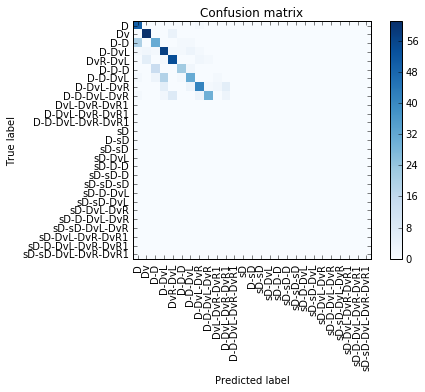

In [29]:
from Tools import plot_confusion_matrix
from prePostTools import M1,M0
#get_statistiques??
#print RNN2D_sub[-2]l
plot_confusion_matrix(RNN2D_first[-1],labels=M1,rotation=90)
print RNN2D_first[0],RNN2D_first[3]
#7_18 14.7 27.6 #graphp
#8_0 14.5 24.8
#15.4 26.2
#14.1 21.6

19.0596169498
17.4858137119
[[15939   819    22   634   166     4]
 [ 2771  3155   179   135     1     0]
 [   80   625   673     0     0     0]
 [  645    62     0 18547   418   287]
 [  288     4     0   770  4362   198]
 [   40     0     0   116   281   879]]
[[16589   320     3   590    82     0]
 [ 3799  2295    77    70     0     0]
 [  228   861   289     0     0     0]
 [  517    77    33 18393   745   194]
 [  159     6     0   833  4599    25]
 [   30     0     0   125   291   870]]
HMM 190 38.0
Neural 145 29.0
[[49  0  1  0  0  1  0  0  0  0  0  0]
 [ 0 59  0  0  6  0  0  0  0  0  0  0]
 [17  0 27  1  0  3  5  0  0  0  0  0]
 [ 1  2  1 54  0  0  7  2  0  0  0  0]
 [ 0  9  0  1 44  0  0  2  6  0  1  1]
 [ 0  0 12  0  0 24  2  0  0  0  0  0]
 [ 1  0  2 15  0  2 32  1  0  2  0  1]
 [ 0  0  0  7  0  0  1 39  0  4  7  1]
 [ 1  0  0  2 12  0  0  3 27  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]
[[50

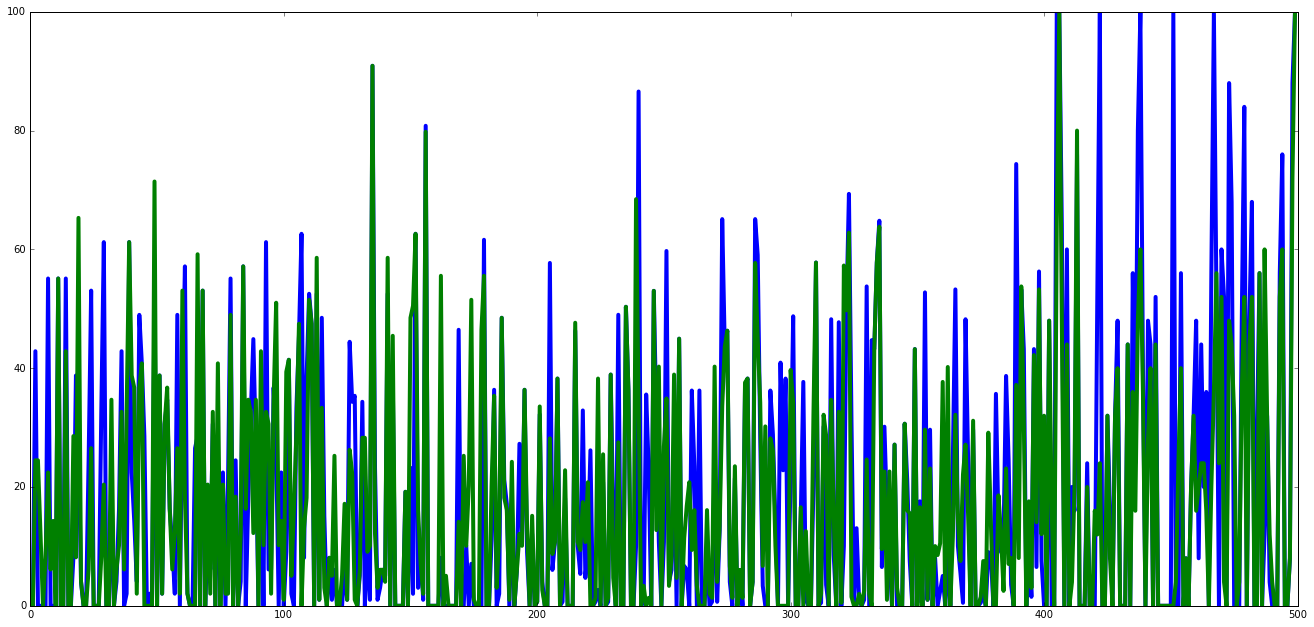

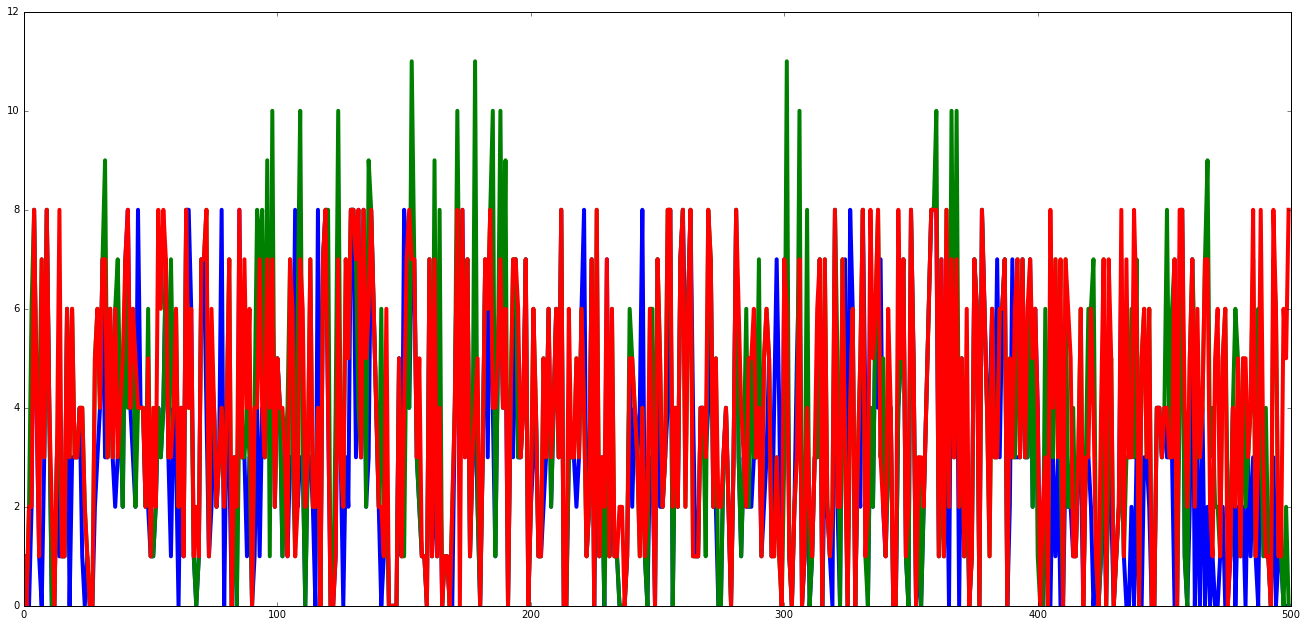

In [38]:
from Tools import get_step_class,clean,M0,Labels,M1
from sklearn.metrics import confusion_matrix

root = "/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_mat/"
hmm = []
RNN = []
SVM = []
Class_RNN = []
Class_HMM = []
figure(figsize=(20,10))
zone = range(0,500)
mv = []
mv_RNN = []
mv_HMM = []

sub=True

for i in zone:
    
    PrM,states,labels,possible,possible2,t = get_step_class(root+"/res%i.mat"%i)
    
    init = np.argmax(Y_tests[i],axis=1)
    
    l=len(X_traj_test[i][1])-2
    #print l

    if possible != []:
        #print init
        #print possible
        diff = [ np.sum(init[:l] != possible[k][:l]) for k in range(len(possible))]
        #print diff
        states = possible[np.argmin(diff)]
        #print i,diff
        #print i,len(possible),labels
        """ 
        diff = [ np.sum(init[:l] != possible2[k][:l]) for k in range(12)]
        states = possible2[np.argmin(diff)]
        """
    
    classi_RNN = np.argmax(pred_RNN[i][:l],axis=1)
    
    
    delta_RNN = np.sum(classi_RNN != init[:l]) 


    perm = np.array([[0, 1, 2, 3, 4, 5, 6],
                 [0, 1, 2, 4, 5, 3, 6],
                 [0, 1, 2, 5, 4, 3, 6],
                 [0, 1, 2, 3, 5, 4, 6],
                 [0, 1, 2, 4, 3, 5, 6],
                 [0, 1, 2, 5, 3, 4, 6]],dtype=np.int)
    if sub:
        perm = np.array([[0, 1, 2, 3, 4, 5, 6]+range(7,10),
                 [0, 1, 2, 4, 5, 3, 6]+range(7,10),
                 [0, 1, 2, 5, 4, 3, 6]+range(7,10),
                 [0, 1, 2, 3, 5, 4, 6]+range(7,10),
                 [0, 1, 2, 4, 3, 5, 6]+range(7,10),
                 [0, 1, 2, 5, 3, 4, 6]+range(7,10)],dtype=np.int)
    
    fight=True
    
    deltas = []
    for permutation in perm:
        classi_RNN = clean(pred_RNN[i][:l,permutation],np.argmax(pred_RNN_cat[i]),fight=fight,sub=sub)
        deltas.append(np.sum(classi_RNN != init[:l]) )

    best = np.argmin(deltas)
    classi_RNN = clean(pred_RNN[i][:l,perm[best]],np.argmax(pred_RNN_cat[i]),fight=fight,sub=sub)
        
    Class_RNN.append(classi_RNN)
    Class_HMM.append(states[:l])
    hmm.append(np.sum(init[:l] != states[:l])*100./l)
    RNN.append(np.sum(init[:l] != classi_RNN[:l])*100./l)
    
    mv.extend(init[:l])
    mv_RNN.extend(classi_RNN[:l])
    mv_HMM.extend(states[:l])
    
hmm = np.array(hmm)
RNN = np.array(RNN)
print hmm.mean()
print RNN.mean()
#print hmm[295:]
plot(hmm)
plot(RNN)

print confusion_matrix(mv,mv_RNN)
print confusion_matrix(mv,mv_HMM)

mvc = []
mvc_RNN = []
mvc_HMM = []

figure(figsize=(20,10))

hmm = []
RNN = []
GT = []
misp_HMM = []
correct_HMM = []
misp_RNN = []
correct_RNN = []
for i in zone:
    
    PrM,_,labels,possible,possible2,_ = get_step_class(root+"/res%i.mat"%i)
    
    cat = np.argmax(Y_test_cat[i])
        
    catRNN = np.argmax(pred_RNN_cat[i])
    
    catHMM = np.argmax(PrM)
    
    hmm.append(catHMM)
    RNN.append(catRNN)
    GT.append(cat)

    mvc.append(cat)
    mvc_RNN.append(catRNN)
    mvc_HMM.append(catHMM)
    
    
    if cat != catRNN:
        misp_RNN.append(pred_RNN_cat[i][0,cat])
    else:
        correct_RNN.append(pred_RNN_cat[i][0,cat])
        
    if cat != catHMM:
        misp_HMM.append(PrM[cat])
    else:
        correct_HMM.append(PrM[cat])
    
hmm = np.array(hmm)
RNN = np.array(RNN)
GT = np.array(GT)


print "HMM",np.sum(GT != hmm),np.sum(GT != hmm) *100./len(hmm) 
print "Neural",np.sum(GT != RNN),np.sum(GT != RNN) *100./len(RNN) 
plot(hmm)
plot(RNN)

plot(GT) 

print confusion_matrix(mvc,mvc_RNN)
print confusion_matrix(mvc,mvc_HMM)

26
50
100
150
200


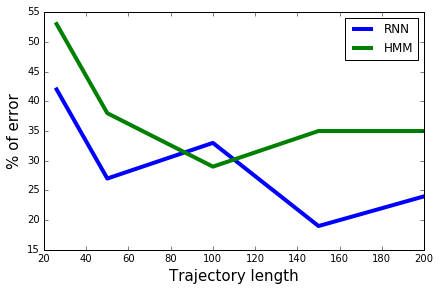

In [39]:

acc = {"RNN" : [],"hmm":[],"L":[]}
for i in [4,0,1,2,3]:
    step = 100
    acc["L"].append(pred_RNN[i*step].shape[0])
    print acc["L"][-1]
    acc["RNN"].append(np.sum(GT[i*step:(i+1)*step] != RNN[i*step:(i+1)*step]) )
    acc["hmm"].append(np.sum(GT[i*step:(i+1)*step] != hmm[i*step:(i+1)*step]) )
plot(acc["L"],acc["RNN"],label="RNN")
plot(acc["L"],acc["hmm"],label="HMM")
ylabel("% of error",fontsize=15)
xlabel("Trajectory length",fontsize=15)
legend(loc="best")

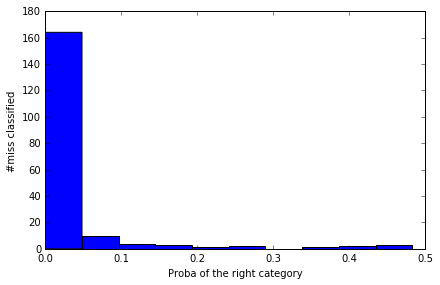

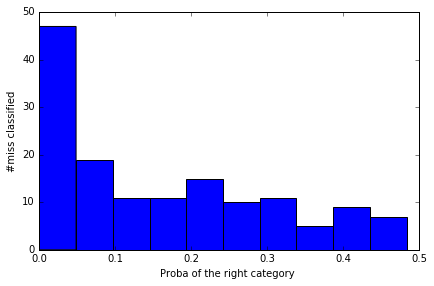

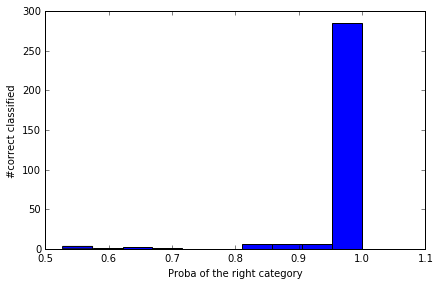

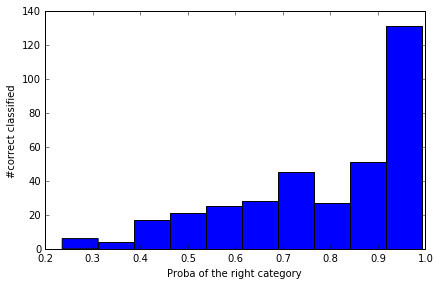

In [40]:
hist(misp_HMM)
ylabel("#miss classified")
xlabel("Proba of the right category")
figure()
hist(misp_RNN)
ylabel("#miss classified")
xlabel("Proba of the right category ")
figure()

hist(correct_HMM)
ylabel("#correct classified")
xlabel("Proba of the right category")
figure()
hist(correct_RNN)
ylabel("#correct classified")
xlabel("Proba of the right category ")

In [417]:
print set(mvc_RNN)

set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 23, 24])


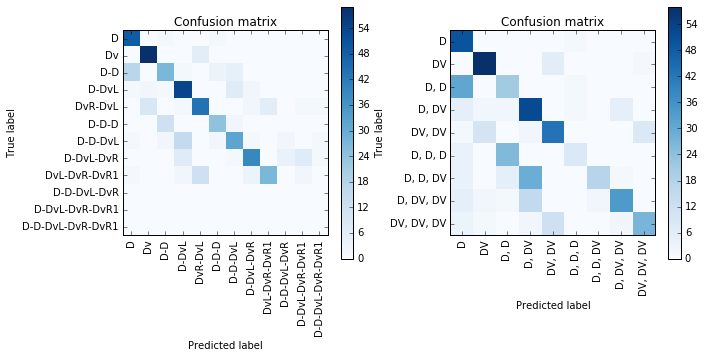

In [41]:
from Tools import plot_confusion_matrix
from prePostTools import M0
f = figure(figsize=(10,5))
ax = f.add_subplot(121)
plot_confusion_matrix(confusion_matrix(mvc,mvc_RNN),labels=M0,rotation=90)

ax = f.add_subplot(122)
plot_confusion_matrix(confusion_matrix(mvc,mvc_HMM),labels=Labels,rotation=90)

f.tight_layout()

In [69]:
#print np.argmax(Y_tests[8],axis=-1)
#print np.argmax(pred_RNN_cat[8],axis=-1)
#print np.argmax(pred_RNN[8],axis=1)

#print Class_RNN[8]

#print  get_step_class(root+"/res%i.mat"%208)
print M1[np.argmax(pred_RNN_cat[8],axis=1)]
print np.argmax(pred_RNN[8],axis=-1)
print Class_RNN[8]

D-DvL
[0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


12 27


([<matplotlib.axis.XTick at 0x7f5b7686ab90>,
 <a list of 12 Text xticklabel objects>)

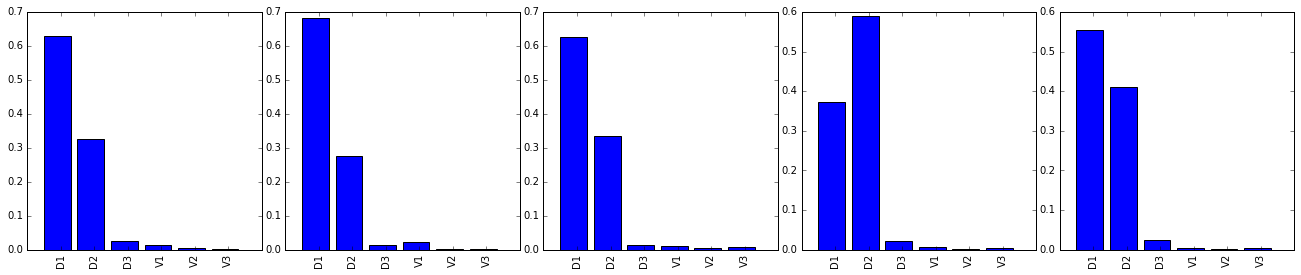

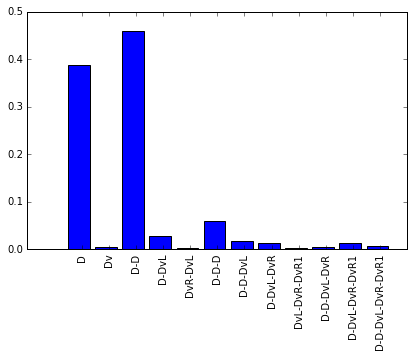

In [53]:
f = figure(figsize=(20,4))
for i in range(5):
    ax = f.add_subplot(1,5,i+1)
    pred_RNN[2]
    bar(np.arange(6)-0.5,pred_RNN[2][i][:6],color="b")
    xticks(range(6), ["D1","D2","D3","V1","V2","V3"],rotation=90)
figure()

print len(M0),len(pred_RNN_cat[2][0])
pred_RNN[2]
bar(np.arange(12)-0.5,pred_RNN_cat[2][0][:12],color="b")
xticks(range(13), M0,rotation=90)


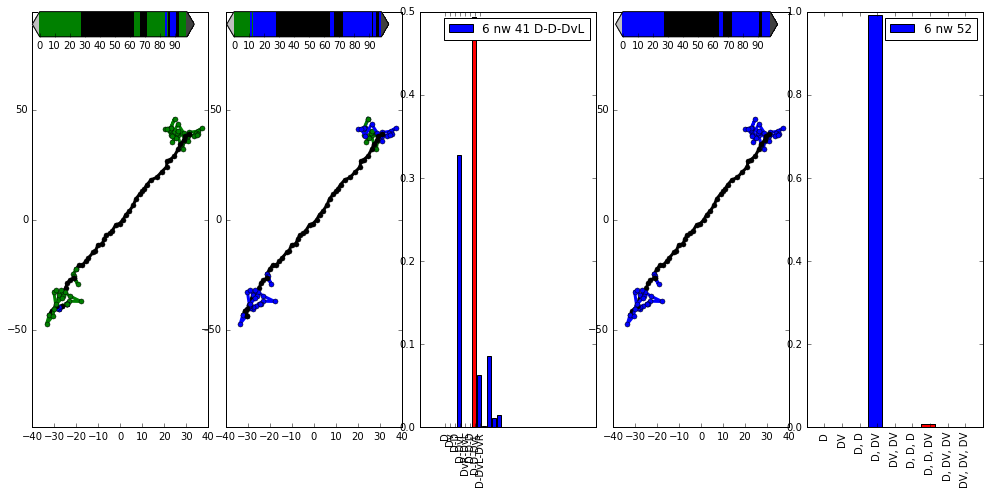

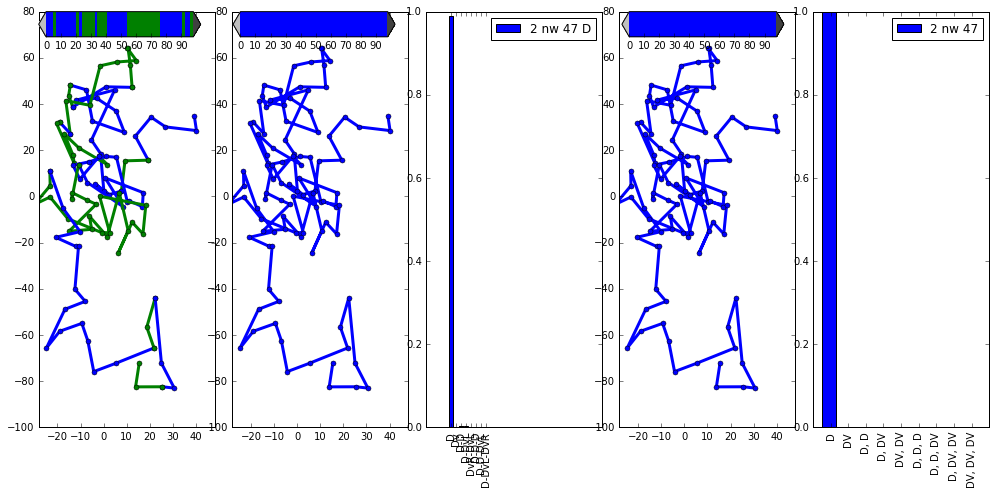

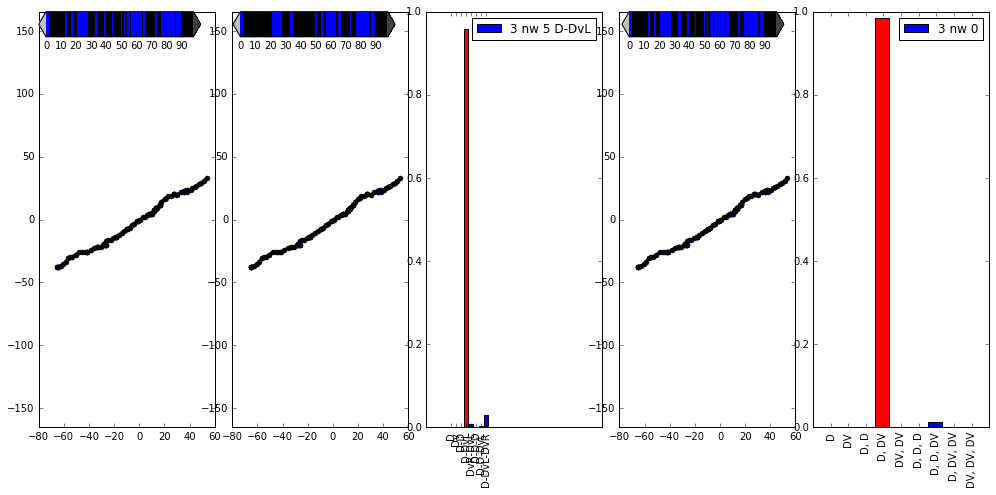

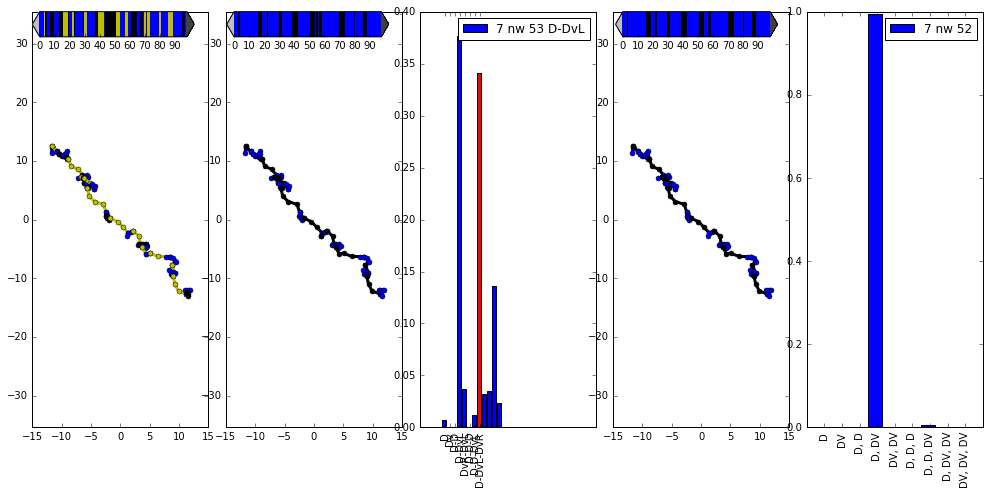

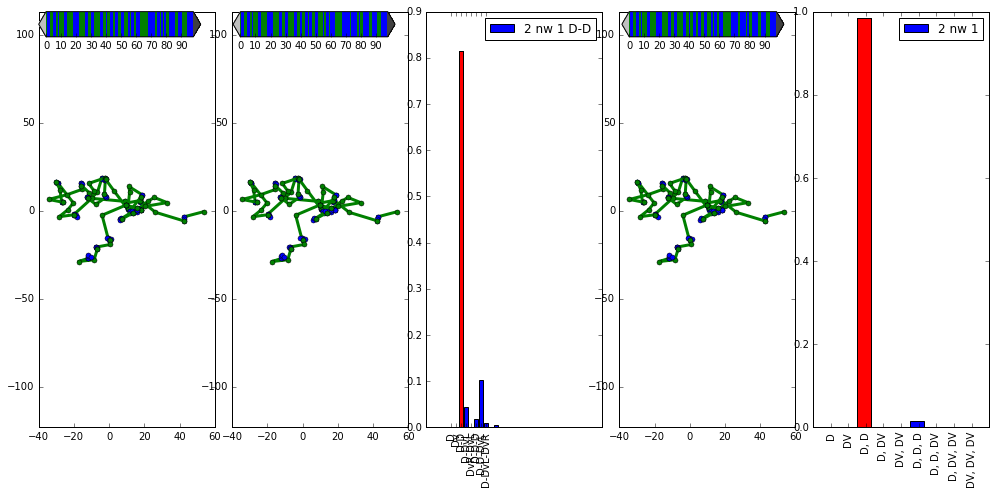

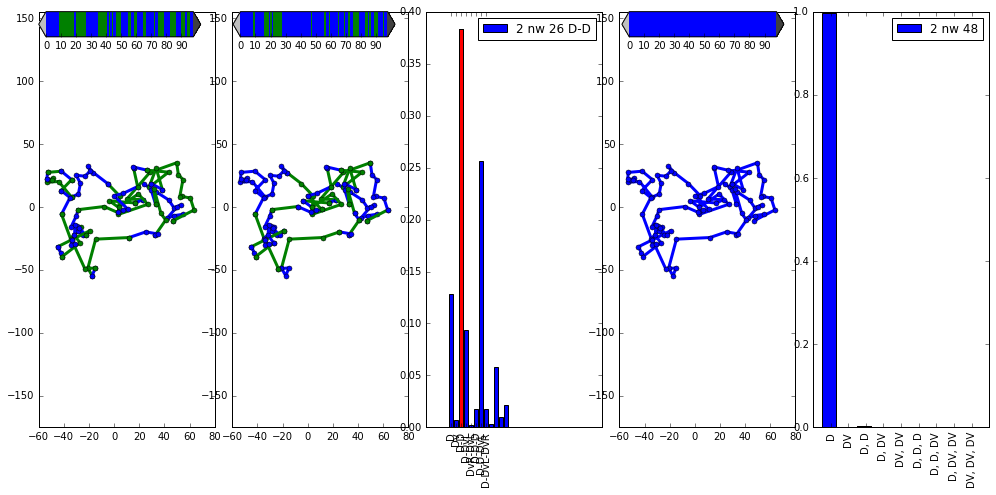

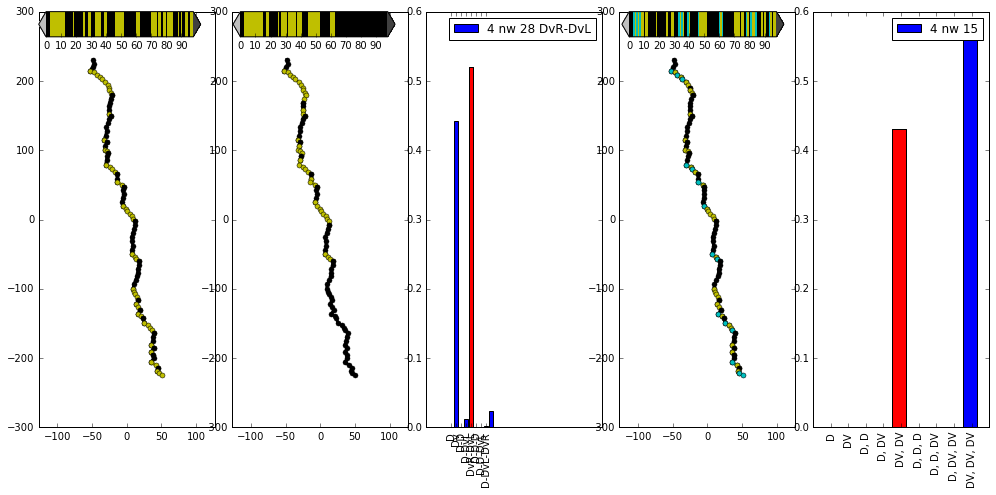

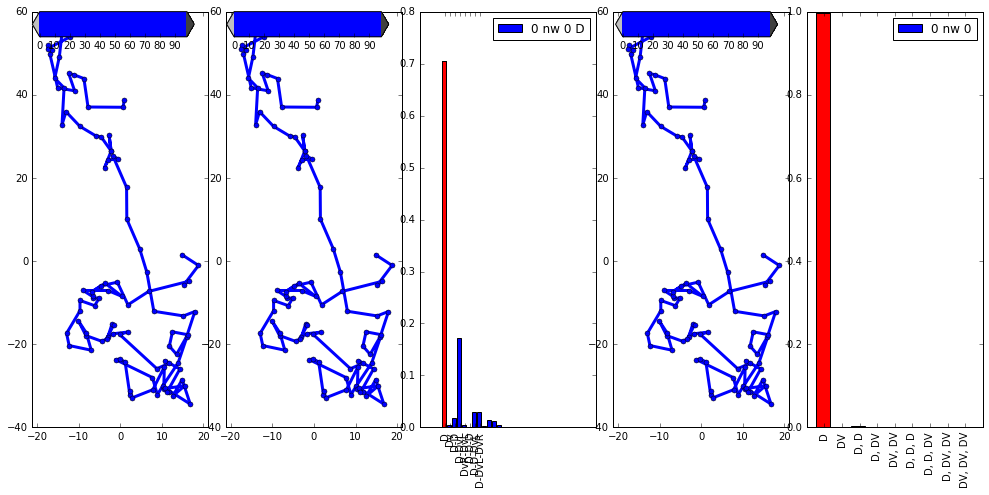

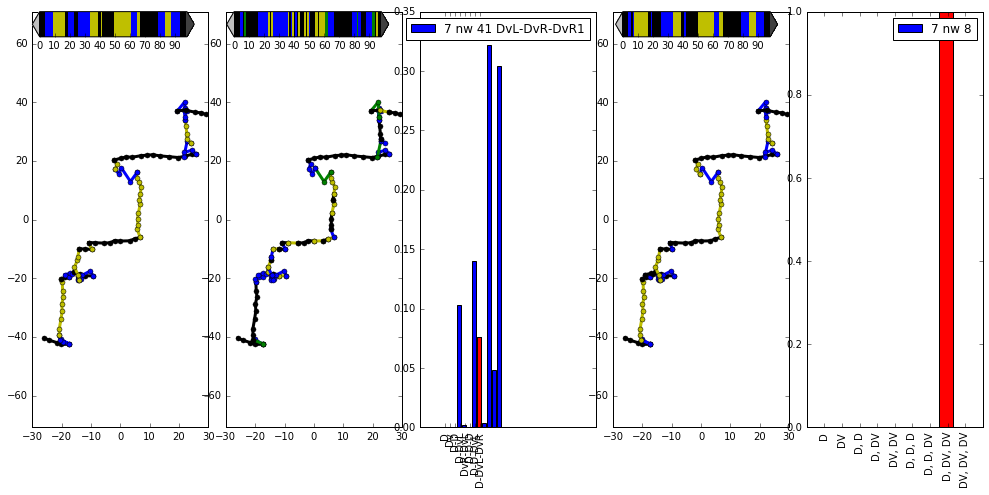

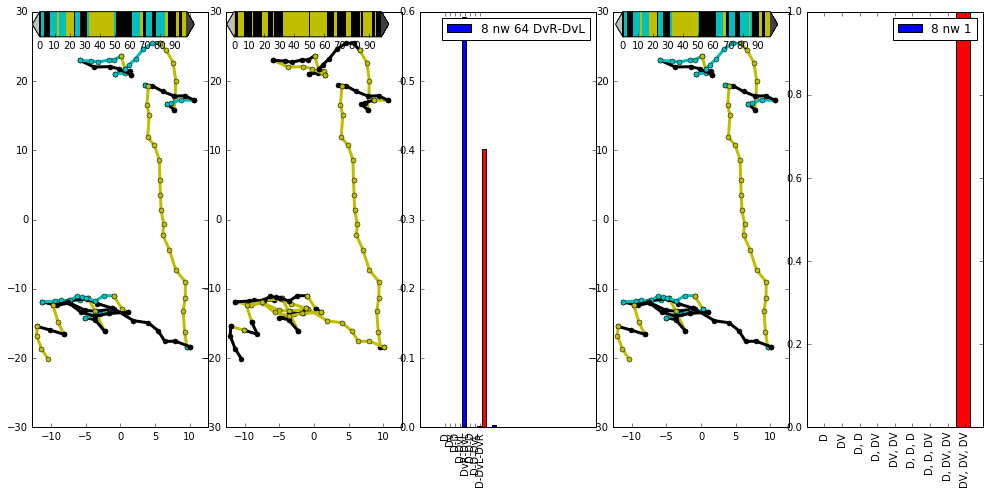

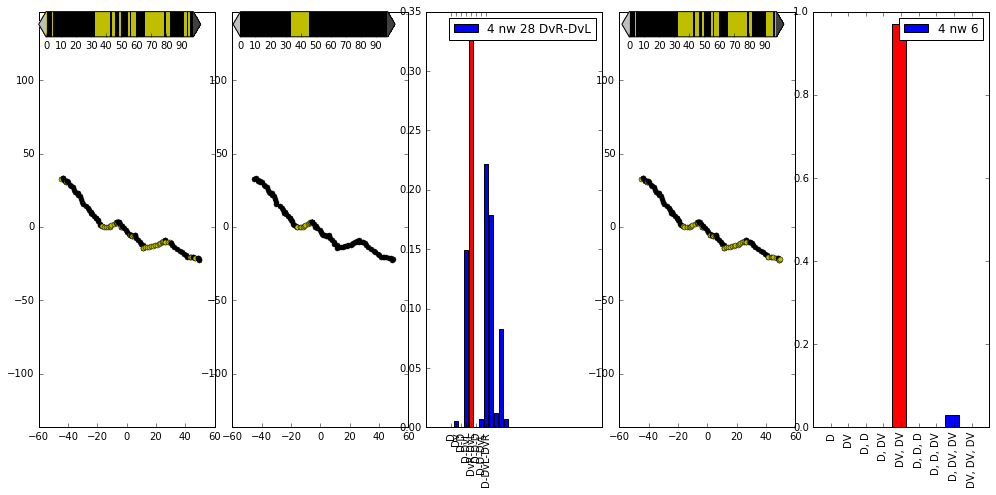

In [70]:
from Tools import plot_label,get_step_class,colors
M0inversed = ["D","Dv","D-D","D-DvL","DvR-DvL","D-D-D", "D-D-DvL","D-DvL-DvR" , "DvL-DvR-DvR1","D-D-DvL-DvR",
      "D-DvL-DvR-DvR1","D-D-DvL-DvR-DvR1"]
Labels = ['D','DV','D, D','D, DV','DV, DV','D, D, D','D, D, DV','D, DV, DV','DV, DV, DV']

#print score.shape
#import matplotlib as plt
l = 99
for i in range(110,121,1):
    #print i
    init = np.argmax(Y_tests[i],axis=-1)

    #proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    #classi = np.argmax(proba,axis=-1)
    
    l = len(init) -1
    classi = Class_HMM[i]
    class_RNN = Class_RNN[i]
    
    PrM,_,labels,possible,possible2,t = get_step_class(root+"/res%i.mat"%i)

    gt = np.argmax(Y_test_cat[i])
    pcat =  np.argmax(pred_RNN_cat[i],axis=-1)

    """if gt == 2 and pcat == 0:
        pass
    else:
        continue"""
    #if gt == pcat:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 40:
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(151)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
    #print X_traj_test[i][1][:l]
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    import matplotlib as mpl

   
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in init[:l]])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax2 = fig.add_axes([0.1, 0.9, 0.15, 0.05])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be
    # monotonically increasing.
    bounds=range(len(init[:l]))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')
    ax = fig.add_subplot(152)
    
       
  
    plot_label(X_traj_test[i][1][:l],class_RNN)
    plt.axis('equal')
    
    
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in class_RNN[:l]])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax3 = fig.add_axes([0.28, 0.9, 0.15, 0.05])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be
    # monotonically increasing.
    bounds=range(len(class_RNN[:l]))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')
    
    """
    ax = fig.add_subplot(144)
    plot( init[:l])
   
    plot(classi[:l],label="N missed %i, %s"%(np.sum(classi[:l] != init[:l]),labels))
    legend()
    """
    ax = fig.add_subplot(153)
    #print pred_RNN_cat[i].shape
    #print pred_RNN_cat[i,0]
    ncat = len(pred_RNN_cat[i][0])
    bar(np.arange(ncat)-0.5,pred_RNN_cat[i][0],label="%i nw %i %s"%(np.argmax(Y_test_cat[i]),
                                                               np.sum(class_RNN[:l] != init[:l]),
                                                                   M1[pred_RNN_cat[i][0].argmax()]))
    plt.legend()
    
    gt = np.argmax(Y_test_cat[i])
    bar(gt-0.5,pred_RNN_cat[i][0][gt],color="r")
    xticks(range(cat), M1,rotation=90)

    legend()
    
    if True:
        ax = fig.add_subplot(154)
        plot_label(X_traj_test[i][1][:l],classi[:l])
        plt.legend()
        plt.axis('equal')
        
        cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in classi[:l]])
        cmap.set_over('0.25')
        cmap.set_under('0.75')
        ax4 = fig.add_axes([0.64, 0.9, 0.15, 0.05])

        # If a ListedColormap is used, the length of the bounds array must be
        # one greater than the length of the color list.  The bounds must be
        # monotonically increasing.
        bounds=range(len(classi[:l]))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        cb2 = mpl.colorbar.ColorbarBase(ax4, cmap=cmap,
                                        norm=norm,
                                        # to use 'extend', you must
                                        # specify two extra boundaries:
                                        #boundaries=[0] + bounds + [13],
                                        extend='both',

                                        spacing='proportional',
                                        orientation='horizontal')

        ax = fig.add_subplot(155)
        #print pred_RNN_cat[i].shape
        #print pred_RNN_cat[i,0]
        bar(np.arange(9)-0.5,PrM,label="%i nw %i"%(np.argmax(Y_test_cat[i]),
                                                   np.sum(classi[:l] != init[:l])))
        plt.legend()
        gt = np.argmax(Y_test_cat[i][0])
        bar(gt-0.5,PrM[gt],color="r")
        xticks(range(9), Labels,rotation=90)
    


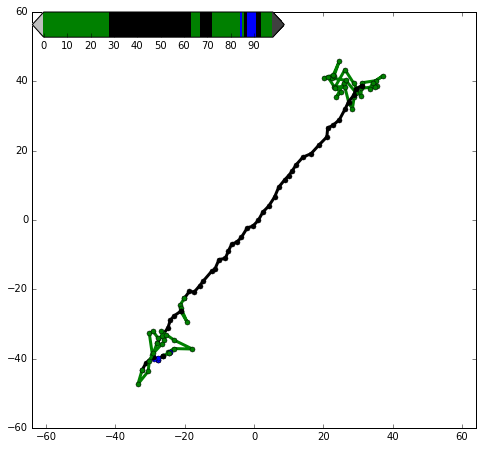

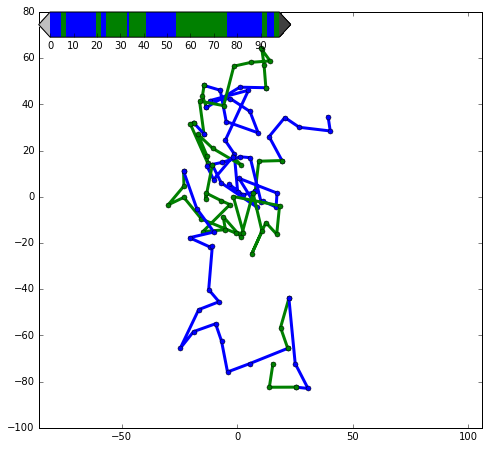

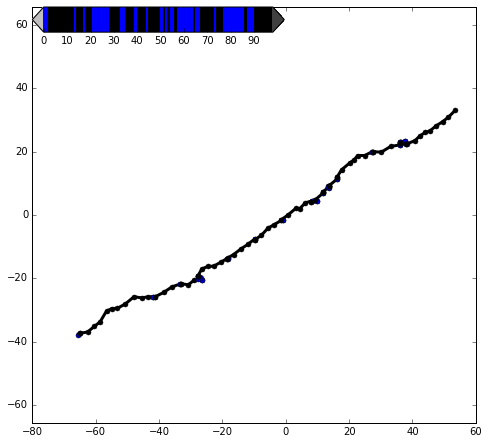

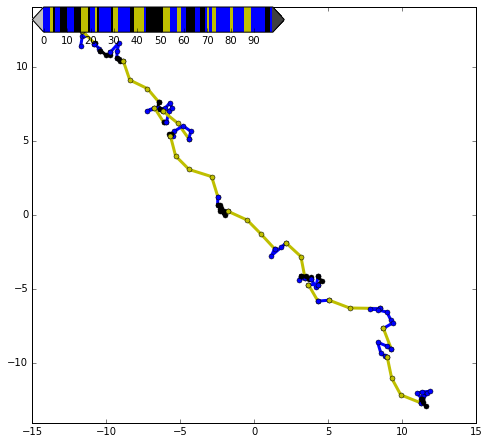

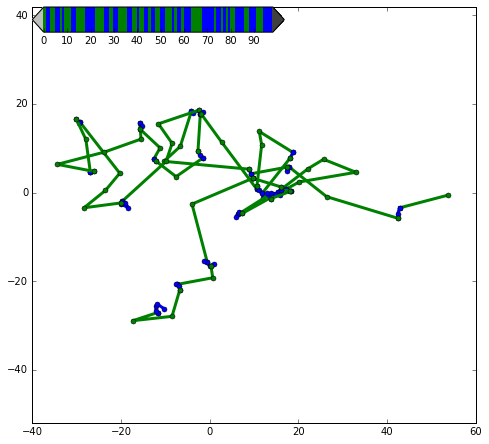

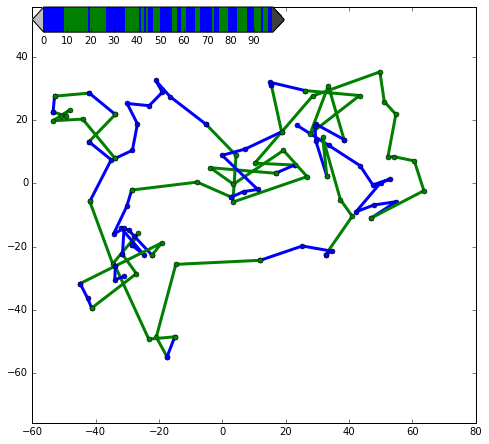

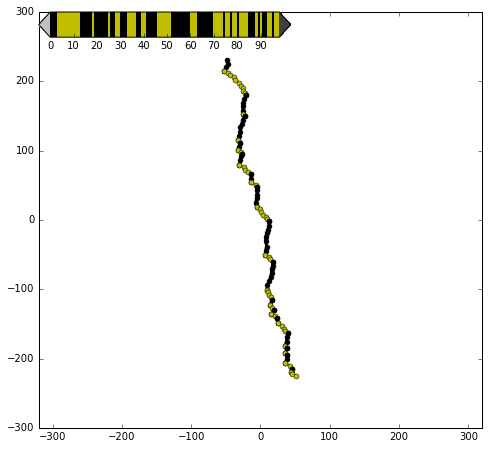

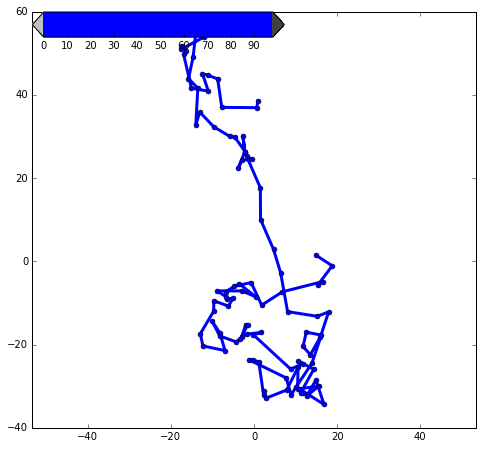

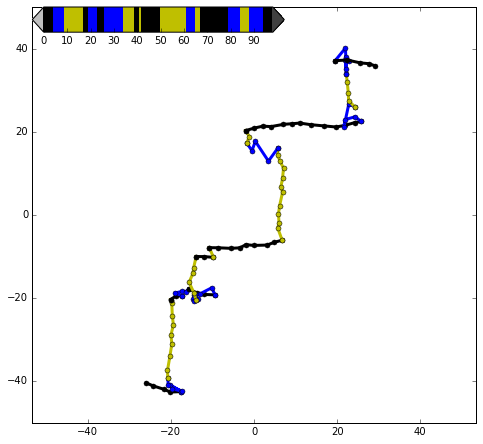

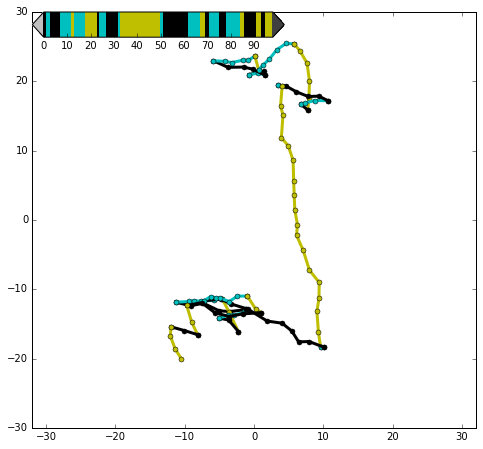

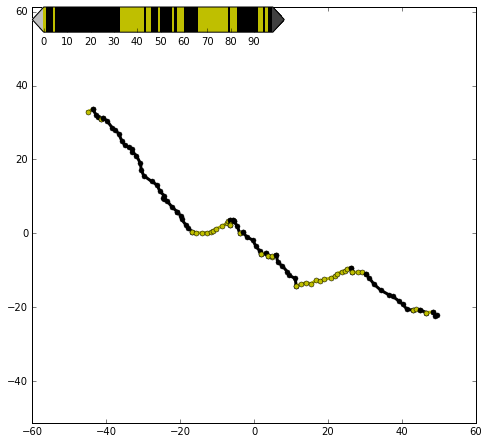

In [29]:
from Tools import plot_label,get_step_class,colors
M0inversed = ["D","Dv","D-D","D-DvL","DvR-DvL","D-D-D", "D-D-DvL","D-DvL-DvR" , "DvL-DvR-DvR1","D-D-DvL-DvR",
      "D-DvL-DvR-DvR1","D-D-DvL-DvR-DvR1"]
Labels = ['D','DV','D, D','D, DV','DV, DV','D, D, D','D, D, DV','D, DV, DV','DV, DV, DV']

#print score.shape
#import matplotlib as plt
l = 99
for i in range(110,121,1):
    #print i
    init = np.argmax(Y_tests[i],axis=-1)

    #proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    #classi = np.argmax(proba,axis=-1)
    
    l = len(init) -1
    classi = Class_HMM[i]
    class_RNN = Class_RNN[i]
    
    PrM,_,labels,possible,possible2,t = get_step_class(root+"/res%i.mat"%i)

    gt = np.argmax(Y_test_cat[i])
    pcat =  np.argmax(pred_RNN_cat[i],axis=-1)

    """if gt == 2 and pcat == 0:
        pass
    else:
        continue"""
    #if gt == pcat:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 40:
    #    continue
    fig = figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
    #print X_traj_test[i][1][:l]
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    import matplotlib as mpl

   
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in init[:l]])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax2 = fig.add_axes([0.1, 0.9, 0.5, 0.05])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be
    # monotonically increasing.
    bounds=range(len(init[:l]))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')

    


In [197]:
#graph.save_weights("Allgood")

import cPickle
with open("/home/jarbona/Theano/test-set-diff_sigma_1.20-deltav_0.40-delta_sigma_directed_6.00.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)

with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_highshift.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)

with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_longuer.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
"""
with open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_allcat.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)"""
#graph.save_weights("Allgood")

'\nwith open("/home/jarbona/Theano/test-set-diff_sigma_2.00-deltav_0.40-delta_sigma_directed_6.00_allcat.pick","r") as f:\n    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)'

In [227]:
with open(name_file,"r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)


In [228]:
from Tools import traj_to_dist
Normed = []
for i in range(0,500):
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::,:2])
    Normed.append(normed)
Normed = np.array(Normed)

In [37]:
graph9.load_weights("tmp")

In [229]:
pred_RNN = []
pred_RNN_cat = []
for i in range(0,500,100):
    pred0 = graph9.predict({"input1":np.array([t for t in X_test[i:i+100]])},batch_size=50)
    #print pred0["category"][::,0,8:10][::,::-1].shape
    #pred0["category"][::,0,8:10] = pred0["category"][::,0,8:10][::,::-1]
    pred0["category"] = pred0["category"][::,newaxis,::]

    pred_RNN.extend(pred0["output"])
    pred_RNN_cat.extend(pred0["category"])
    
    

In [230]:
from Tools import get_statistiques

P_m,N_m,conf_m,P_c,N_c,conf_c = get_statistiques(Y_tests, Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=True)

print P_m,N_m
print conf_m

print P_c,N_c
print conf_c


24.0211132438 52100
[[ 7068   420     4   425   149    87  1773   198     1]
 [  865  2239    75    31    14     3   169   307    51]
 [   55   128   385     3     0     0     9    35     0]
 [  297    19     0 13893   309    90    89     5     0]
 [  201    10     0   591  4659   107   108     4     0]
 [  121    10     4   173   405  1235    49     5     0]
 [ 2428   230    23   323   169    73  7616   441    17]
 [  146   216    58    35    25    10   543  2388   145]
 [    0    26     1     0     0     0    11   196   102]]
44.2 500
[[13  1  1  0  0  0  0  0  0  0  0  0  2  0  1  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0 24  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0 15  0  0  2  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 2  1  0 15  0  0  0  1  0  1  0  0  0  0  0  4  0  0  0  2  0  0  1  0
   0  0  0]
 [ 0  1  0  0 14  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0]
 [ 0  0  2  0  0 10  0  0  

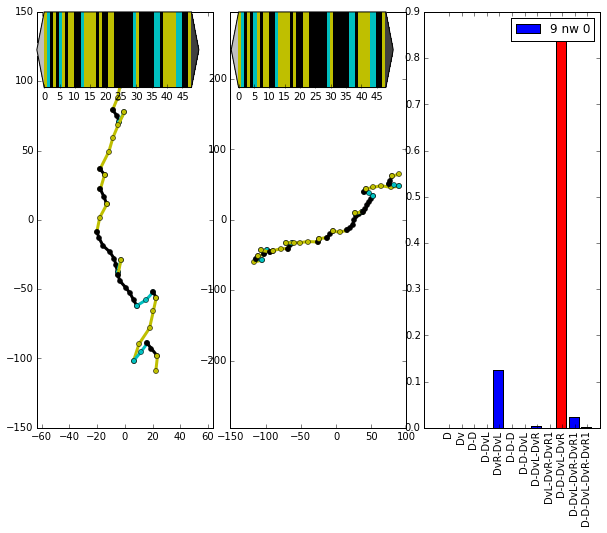

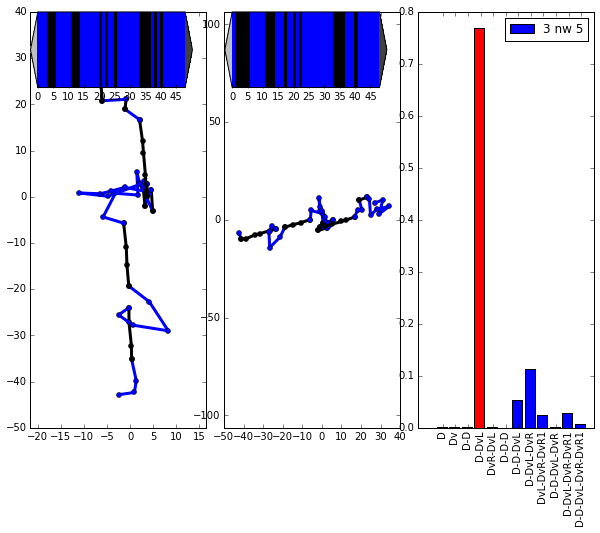

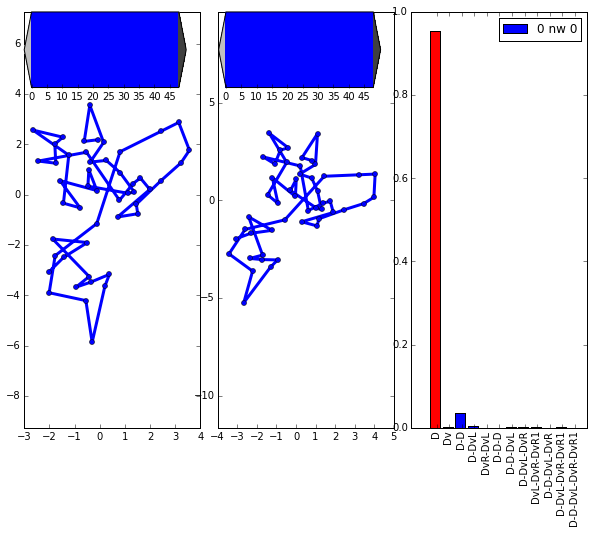

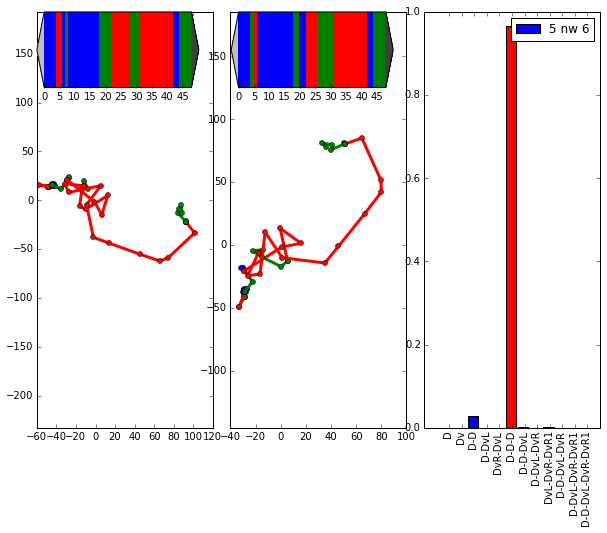

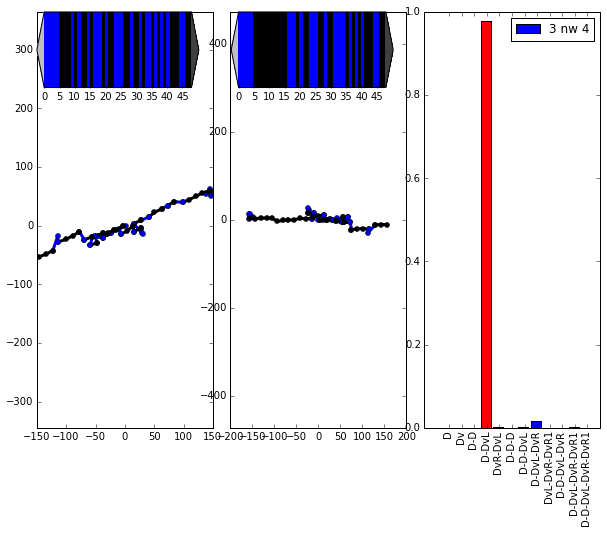

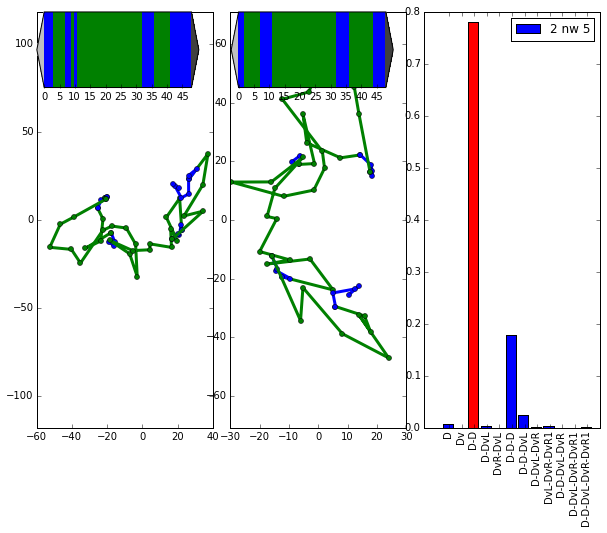

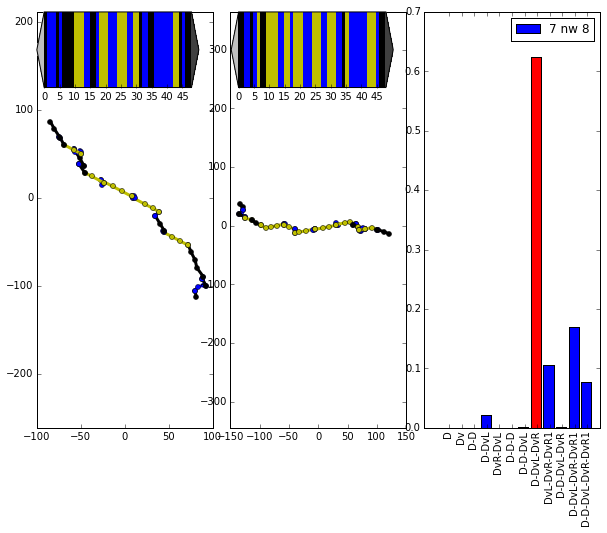

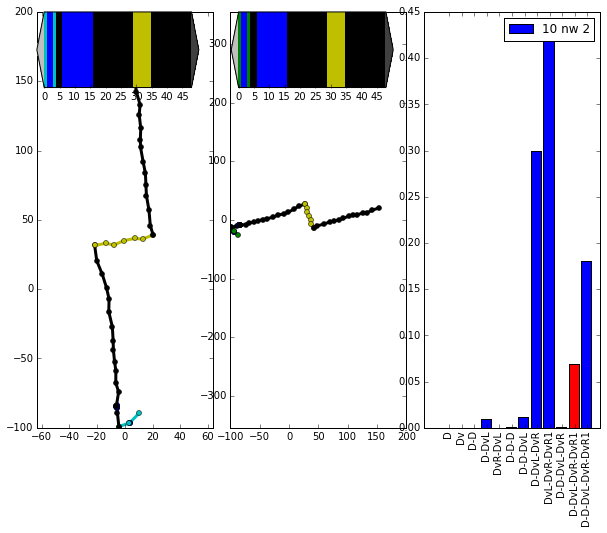

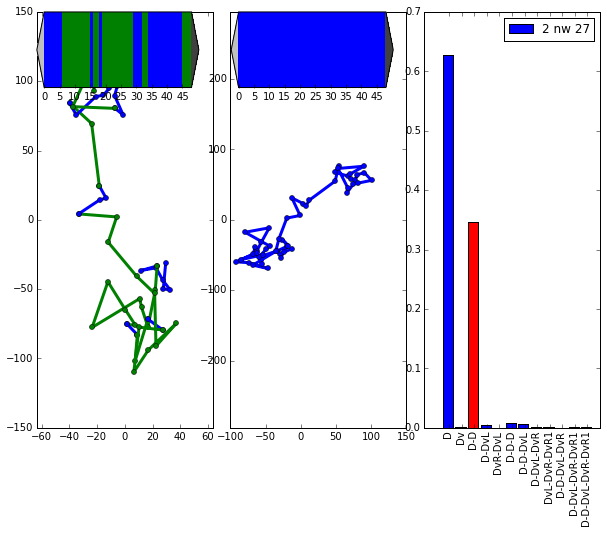

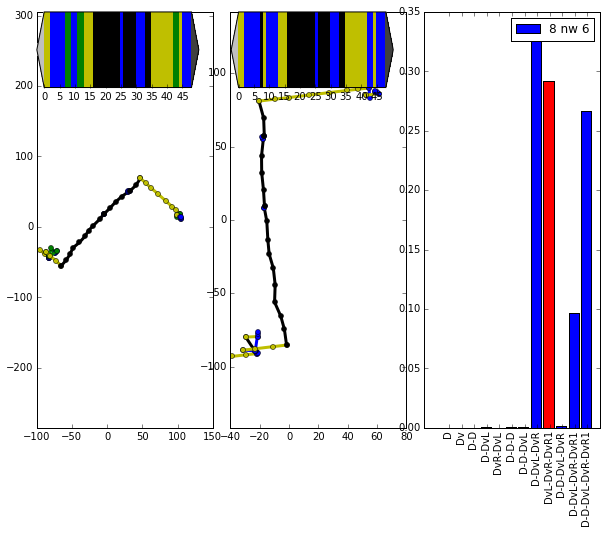

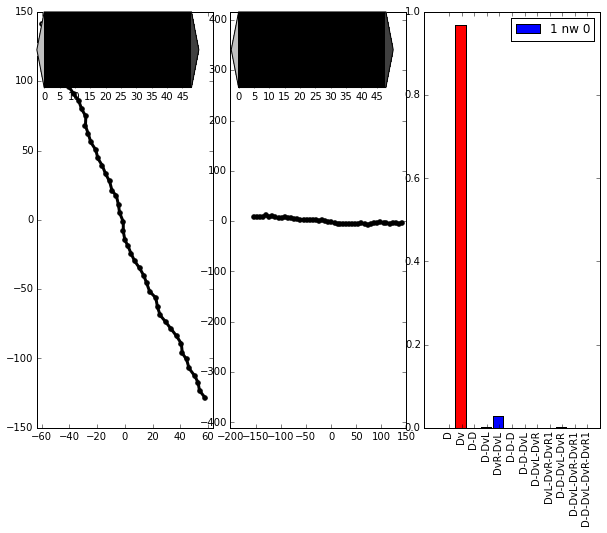

In [137]:
from Tools import plot_label,colors
M0inversed = ["D","Dv","D-D","D-DvL","DvR-DvL","D-D-D", "D-D-DvL","D-DvL-DvR" , "DvL-DvR-DvR1","D-D-DvL-DvR",
      "D-DvL-DvR-DvR1","D-D-DvL-DvR-DvR1"]
Labels = ['D','DV','D, D','D, DV','DV, DV','D, D, D','D, D, DV','D, DV, DV','DV, DV, DV']
#colors = {0:"b",1:"g",2:"r",3:"k",4:"y",5:"c",6:"m"}

#print score.shape
#import matplotlib as plt
l = 199
for i in range(10,21,1):
    #print i
    init = np.argmax(Y_tests[i],axis=-1)

    #proba = pred_RNN[i] #/ np.sum(pred[i],axis=1)[::,newaxis]
    #classi = np.argmax(proba,axis=-1)
    
    l = len(init) -1
    class_RNN = Class_RNN[i]
    

    gt = np.argmax(Y_test_cat[i])
    pcat =  np.argmax(pred_RNN_cat[i])

    """if gt == 2 and pcat == 0:
        pass
    else:
        continue"""
    #if gt == pcat:
    #    continue
    #classi=proba
    #print np.sum(classi != init) 
    #if np.sum(classi[:l] != init[:l]) < 40:
    sub = False
    if sub:

        perm = np.array([[0, 1, 2, 3, 4, 5, 6]+range(7,10),
                     [0, 1, 2, 4, 5, 3, 6]+range(7,10),
                     [0, 1, 2, 5, 4, 3, 6]+range(7,10),
                     [0, 1, 2, 3, 5, 4, 6]+range(7,10),
                     [0, 1, 2, 4, 3, 5, 6]+range(7,10),
                     [0, 1, 2, 5, 3, 4, 6]+range(7,10)],dtype=np.int)
    else:
        perm = np.array([[0, 1, 2, 3, 4, 5, 6],
                     [0, 1, 2, 4, 5, 3, 6],
                     [0, 1, 2, 5, 4, 3, 6],
                     [0, 1, 2, 3, 5, 4, 6],
                     [0, 1, 2, 4, 3, 5, 6],
                     [0, 1, 2, 5, 3, 4, 6]],dtype=np.int)
        
    deltas = []
    for permutation in perm:
        classi_RNN = clean(pred_RNN[i][:l,permutation],np.argmax(pred_RNN_cat[i]),fight=False,sub=True)

        deltas.append(np.sum(classi_RNN != init[:l]) )

    best = np.argmin(deltas)
    class_RNN = clean(pred_RNN[i][:l,perm[best]],np.argmax(pred_RNN_cat[i]),fight=False,sub=True)
   
    #    continue
    fig = figure(figsize=(15,7))
    ax = fig.add_subplot(151)
    #plot(np.cumsum(X_test[i]))
    #ax = fig.add_subplot(121)
    
    #print X_traj_test[i][1][:l]
    
    #plot_traj(X_test[i][:l],init[:l],random_sin=random_sin)
    plot_label(X_traj_test[i][1][:l],init[:l])
    #plot(X_traj_test[i][2][:l,0],X_traj_test[i][2][:l,1])
    plt.axis('equal')
    import matplotlib as mpl

   
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in init[:l]])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax2 = fig.add_axes([0.1, 0.8, 0.15, 0.15])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be
    # monotonically increasing.
    bounds=range(len(init[:l]))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')
    ax = fig.add_subplot(152)
    
       
  
    plot_label(X_traj_test[i][2][:l],class_RNN)
    plt.axis('equal')
    
    
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in class_RNN[:l]])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax3 = fig.add_axes([0.28, 0.8, 0.15, 0.15])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be
    # monotonically increasing.
    bounds=range(len(class_RNN[:l]))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')
    
    """
    ax = fig.add_subplot(144)
    plot( init[:l])
   
    plot(classi[:l],label="N missed %i, %s"%(np.sum(classi[:l] != init[:l]),labels))
    legend()
    """
    ax = fig.add_subplot(153)
    #print pred_RNN_cat[i].shape
    #print pred_RNN_cat[i,0]
    #print pred_RNN_cat[i][0]
    bar(np.arange(len(pred_RNN_cat[i][0]))-0.5,pred_RNN_cat[i][0],label="%i nw %i"%(np.argmax(Y_test_cat[i]),
                                                               np.sum(class_RNN[:l] != init[:l])))
    plt.legend()
    
    gt = np.argmax(Y_test_cat[i])
    bar(gt-0.5,pred_RNN_cat[i][0][gt],color="r")
    xticks(range(len(pred_RNN_cat[i][0])), M0inversed,rotation=90)

    legend()
    
   

#Creating test matlab sample

In [112]:
from Tools import generate_traj,random_rot,traj_to_dist
import cPickle
X_traj = []
X_train = []
Y_train = []
Y_trains = []
Y_train_cat = []

diff_sigma=2.0
deltav=0.4
delta_sigma_directed=6
anisentropy = 0
ndim=2
for i in range(500):
#for i in range(1000):

   
    step = max(np.random.normal(1,1),0.2)
    tryagain = True
    while tryagain:
        try:
            f = 0.05
            mod = 20000
            if i % mod  < f* 2000:
                size = 50
            elif f*2000 <= i % mod < f*4000:
                size=100
            elif f*4000 <= i % mod< f*6000:
                size=150
            elif f*6000 <= i % mod< f*8000:
                size=200
            elif f*8000 <= i % mod < f*10000:
                size=26
            #size += 200
            ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,lower_selfprob=0.4,ndim=ndim,
                                                                       fight=False,diff_sigma=diff_sigma,
                                                                        deltav=deltav,zeros=False,
                                                                        delta_sigma_directed=delta_sigma_directed,
                                                                        force_model = None,sub=False,
                                                                            Ra0=[],Mu0=[],clean=0,
                                                                       anisentropy=anisentropy)
            #ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=True,clean=4,diff_sigma=1.1)
            
               
            alpharot = 2*3.14*np.random.random()
            
            real_traj  = random_rot(real_traj,alpharot,ndim=ndim)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj,ndim=ndim)
            
            for zero in Z:
                normed[zero,::] = 0
            X_traj.append([normed,real_traj,alligned_traj])
            """
            if 3 in sc and 4 in sc:
                #print i, alpha2,alpha
                #delta = np.abs(alpha-alpha2-alpharot)
                delta = np.abs(alpharot-alpha)
                if not(delta < 0.2 or delta > 6):
                    #print "la"
                    sc = np.array(sc)

                    sc[sc == 4] = 5
                    sc[sc == 3] = 4
                    sc[sc == 5] = 3
            """
            tryagain=False
        except IndexError:
            tryagain=True
    X_train.append(normed)
    res = np.zeros((size,10))
    res[range(size),np.array(s,dtype=np.int)] = 1
    Y_train.append(res)
    
    res = np.zeros((size,10))
    res[range(size),np.array(sc,dtype=np.int)] = 1
    Y_trains.append(res)
    #Category
    resc = np.zeros((1,27))
    resc[0,Model_num] = 1
    Y_train_cat.append(resc)
    
name_file = "test-set-diff_sigma_%.2f-deltav_%.2f-delta_sigma_directed_%.2f_anisentropy_%.2f.pick"%(diff_sigma,
                                                                                 deltav,
                                                                                 delta_sigma_directed,anisentropy)
with open(name_file,"w") as f:
    cPickle.dump([X_train,Y_train,Y_trains,Y_train_cat,X_traj],f)
#print np.sum(np.isnan(X_train))

(51, 2)
(101, 2)
(151, 2)
(201, 2)
(27, 2)
11.4165067179 24.8


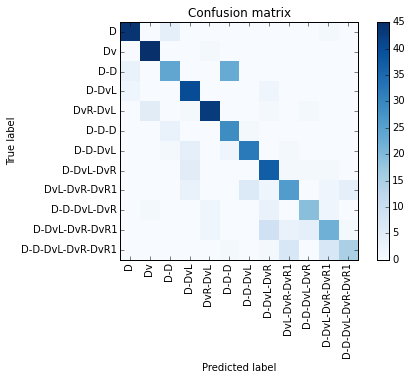

In [138]:
from Tools import plot_confusion_matrix
from prePostTools import M1,M0
#get_statistiques??
#print RNN2D_sub[-2]
with open(name_file,"r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
Normed = []
for i in range(0,500):
    if i%100 == 0:
        print X_traj_test[i][1][::].shape 
        
    alligned_traj,normed,alpha,_ = traj_to_dist(X_traj_test[i][1][::],ndim=2)
    Normed.append(normed)
Normed = np.array(Normed)
graph9.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
graph7.load_weights("saved_weights/two_bilayer_without_sub")
pred_RNN, pred_RNN_cat = get_result(graph7,Normed=Normed,three_l=False,fight=False)
RNN2D_first = get_statistiques(Y_test,Y_test_cat,pred_RNN,pred_RNN_cat,fight=False,sub=False)

plot_confusion_matrix(RNN2D_first[-1],labels=M0,rotation=90)
print RNN2D_first[0],RNN2D_first[3]

In [12]:
from scipy.io import loadmat,savemat
M = loadmat("/home/jarbona/HMM-Bayes_v1.0/Demo code/data//example_track.mat")
print M['track_fig1'].shape
#M["track_fig1"] = 10*traj[:200,:2].T
savemat("test.mat",M)

(2, 150)


In [14]:
testfile= '/home/jarbona/RNN_mus/test.mat'
for i in range(500):
    traj = X_traj[i][2]
    M["track_fig1"] = 10*traj[:200,:2].T
    savemat("%s_mat/test%i.mat"%(name_file[:-5],i),M)
    ext='/home/jarbona/RNN_mus/res%i'%i
    cmd = "hmm_skeleton('%s','%s')"%(testfile,ext)
    #print cmd 
    #A = mlab.run_code(cmd)
    #print A

In [29]:
Mp = loadmat("/home/jarbona/RNN_mus/res0",squeeze_me=False)


In [39]:
print len(Mp["results"][0][0])
kPrM=0
kML_states= 1
kML_params = 2
ktrack = 5
print Mp["results"][0][0][kML_states]

7
[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 3 3 3 3 3 3 1 3 3 3 1 1 3 3 1 3 1 1 3 3 3 1 3 3 1 1 3 1 3 1 3 3 1 1 3 1
  3 3 1 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


In [20]:
#Open ground truth
with open("test-set3-small.pick","r") as f:
    [X_test,Y_test,Y_tests,Y_test_cat,X_traj_test] = cPickle.load(f)
#with open("test-set2_res.pick","r") as f:
#    Y_pred_RNN , Y_pred_RNN_cat = cPickle.load(f) 

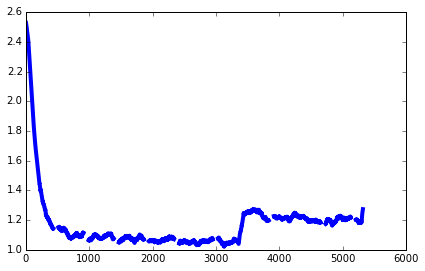

In [130]:
import cPickle
from scitool.propertie import Propertie
losses,val_losses = cPickle.load(open('losses3.pickle',"rb"))


l = 33


plot( Propertie(losses).smooth(40))


In [46]:
import cPickle
from scitool.propertie import Propertie
from pylab import plot
losses,val_losses = cPickle.load(open('/home/jarbona/Theano/2layer-LSTM.pick',"rb"))
print losses.keys()

[50, 100, 150]


[100, 200, 400, 50, 150, 26]
100 2.040 0.759
200 1.775 0.590
400 2.590 0.523
50 2.983 1.091
150 1.866 0.669
26 2.064 1.360


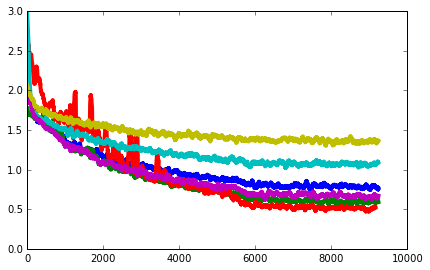

In [36]:
import cPickle
from scitool.propertie import Propertie
from pylab import plot
name = '/home/jarbona/Theano/2layer-LSTM.pick'
name = '/home/jarbona/cluster_theano_myriad//4layer-LSTM-remove-small-fraction-and-400-sub-3D-suite3.pick'
name = '/home/jarbona/cluster_theano_myriad0/4layer-LSTM-uniform-add-error-and-400-3D-suite3.pick'
name = '/home/jarbona/cluster_theano/4layer-LSTM-uniform-add-error-and-400-2D.pick'
losses,val_losses = cPickle.load(open(name,"rb"))



#plot(losses[:l])
figure()
print losses.keys()
for k in losses.keys():
    #print k,losses[k]
    top = Propertie(losses[k]).smooth(30)
    plot(top)
    #plot(np.concatenate(lossescat[i]))
    print k,"%.3f %.3f"%(Propertie(losses[k]).smooth(30)[0] ,Propertie(losses[k]).smooth(30)[-1])
    
#xlim(1000,None)
#ylim(None,2)

[100, 200, 400, 50, 150, 26]
26 1.093
26 0.992
26 0.919
26 1.427


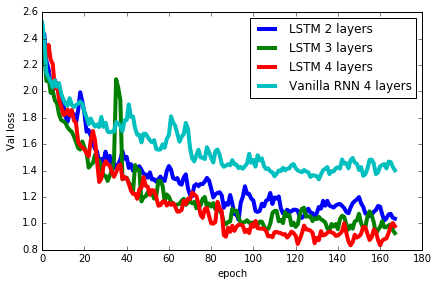

In [38]:
import cPickle
from scitool.propertie import Propertie
from pylab import plot
name = '/home/jarbona/Theano/2layer-LSTM.pick'
#name = '/home/jarbona/cluster_theano/3layer-LSTM.pick'
losses2,val_losses2 = cPickle.load(open(name,"rb"))

name = '/home/jarbona/cluster_theano/3layer-LSTM.pick'
losses3,val_losses3 = cPickle.load(open(name,"rb"))

name = '/home/jarbona/cluster_theano/4layer-LSTM.pick'
losses4,val_losses4 = cPickle.load(open(name,"rb"))

name = '/home/jarbona/Theano/4layer-LSTM-simple.pick'
#name = '/home/jarbona/cluster_theano/3layer-LSTM.pick'
losses4s,val_losses4s = cPickle.load(open(name,"rb"))


#plot(losses[:l])
title = ["LSTM 2 layers","LSTM 3 layers","LSTM 4 layers","Vanilla RNN 4 layers"]
los = [losses2,losses3,losses4,losses4s]
vlos = [val_losses2,val_losses3,val_losses4,val_losses4s]
figure()
print losses.keys()
for (loss,tit) in zip(vlos,title):
    #print k,losses[k]
    top = Propertie(loss[200]).smooth(2)
    plot(top,label=tit)
    #plot(np.concatenate(lossescat[i]))
    print k,"%.3f"%Propertie(loss[200]).smooth(20)[-1] 
legend(loc="best")
xlabel("epoch")
ylabel("Val loss")

savefig("/home/jarbona/Dropbox/RNN/Paper/#Figures/FigS1.png")
#xlim(1000,None)
#ylim(None,3)

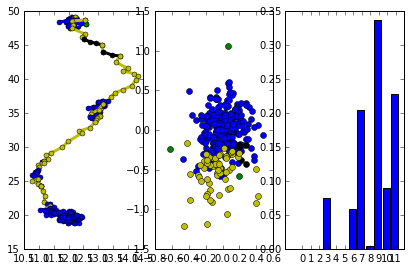

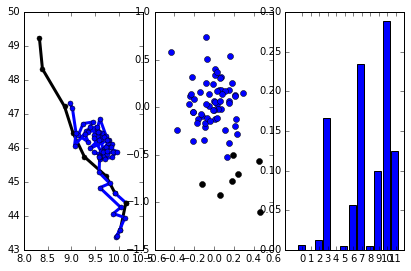

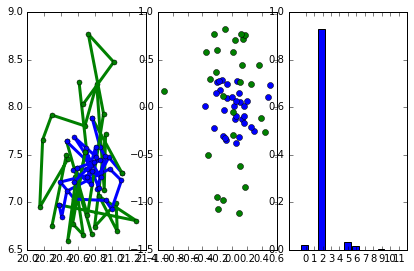

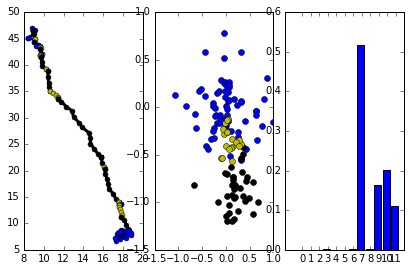

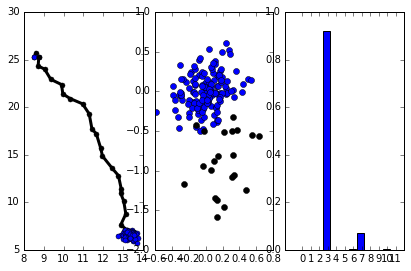

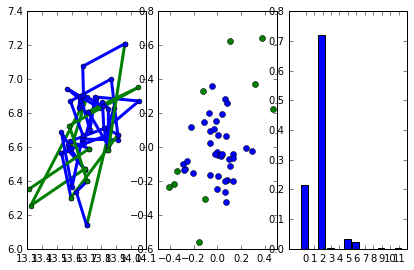

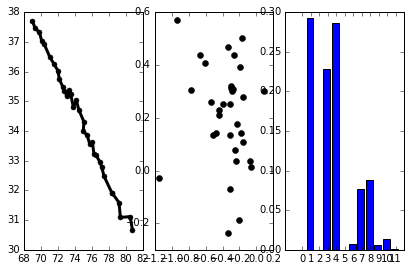

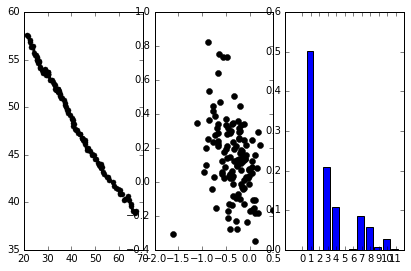

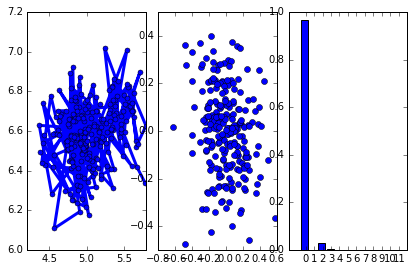

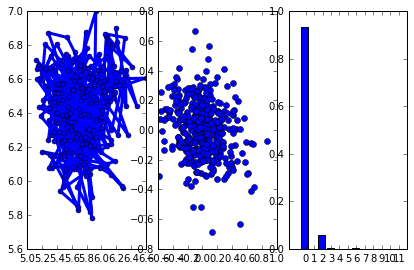

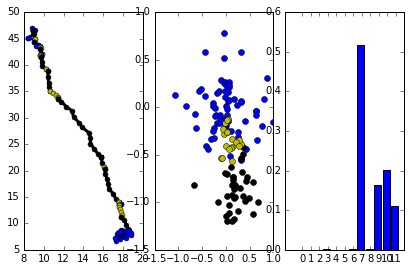

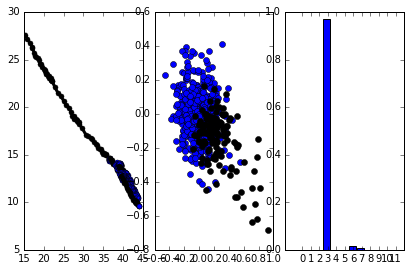

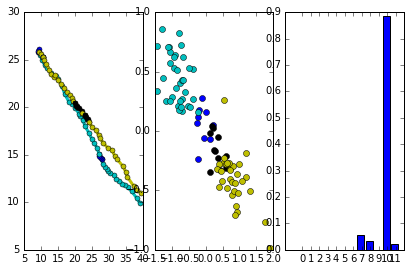

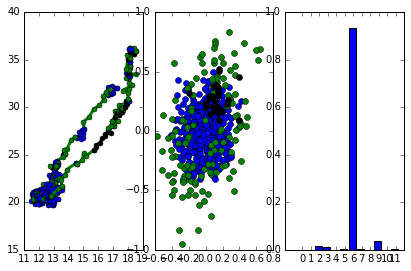

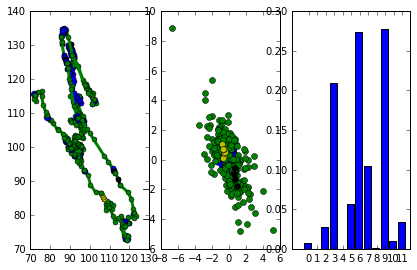

In [104]:
from scipy.io import loadmat
from prePostTools import clean_initial_trajectory,clean,put_back_nan,M0,M1
from Tools import plot_by_class,plot_label
sub = False
#graph.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
#graph.load_weights("cutter_2_6_diff_size_50")
def process_one_file(filetoopen,graph,sm=0):
    trajs = []

    M = loadmat(filetoopen)


    pred_RNNs = []
    pred_RNN_cats = []

    M["analysisInfo"] = { "tool": "RNN",
                      "mu_emit_unit":"pixel",
                         "mu_real_unit":"pixel",
                      "sigma_emit_unit":"pixel",
                       "D_emit_unit":"Assuming your unit for the piel size was nanometer, in mu^2/s"}

    if sub:
         M["analysisInfo"]["PrM_labels"] = np.array(M1,dtype=np.object)
    else:
         M["analysisInfo"]["PrM_labels"] = np.array(M0,dtype=np.object)

    px = M["movieInfo"]["pixelSize"][0][0][0][0] / 1000. #In micro meter
    fr = M["movieInfo"]["frameRate"][0][0][0][0]


    M["results"] = []
    #NewField = ["ML_states","PrM","steps",'ML_params']

    #Copy old fields
    #M["tracksProc"] #= {field:M["tracksProc"][field][0] for field in M["tracksProc"].dtype.names}

    #print M["tracksProc"]["pos"].shape
    #Add new fields
    #tmp = {}
    #for field in NewField:
    #    M["tracksProc"][field] = np.empty(len(M["tracksProc"]["pos"]), dtype=np.object)

    ntraj = len(M["tracksProc"][0]["pos"])


    for itraj,traj0 in enumerate(M["tracksProc"][0]["pos"]):

        #print traj
        #traj0 = traj
        #traj0 = traj0[-300:]
        #print len(traj0)
        #print traj0.shape
        #print traj0.shape
        #traj0 = traj0[::,:]
        #print len(traj0)
        traj,alligned_traj,normed,zeros,nans,added0 = clean_initial_trajectory(traj0)
        if sm != 0:
            
            """
            traj[::,0] = Propertie(traj[::,0]).smooth(sm)
            traj[::,1] = Propertie(traj[::,1]).smooth(sm)
            
            alligned_traj,normed,alpha,_ = traj_to_dist(traj,ndim=2)
            """
            
            
            real_traj1 = np.array([Propertie(traj[::,0]).smooth(2),
                                   Propertie(traj[::,1]).smooth(2)])
            alligned_traj1,normed1,alpha1,_ = traj_to_dist(real_traj1.T,ndim=ndim)
            real_traj2 = np.array([Propertie(traj[::,0]).smooth(5),
                                   Propertie(traj[::,1]).smooth(5)])
            alligned_traj2,normed2,alpha2,_ = traj_to_dist(real_traj2.T,ndim=ndim)

            normed = np.concatenate((normed[::,:4],normed1[::,:4],normed2),axis=1)
            
            
        trajs.append(alligned_traj)
        #print normed.shape
        #pred0 = graph9.predict({"input1":normed[newaxis,::,::]})


        pred0 = graph.predict({"input1":normed[np.newaxis,::,::]},  batch_size=1)

        pred_RNN = pred0["output"]
        pred_RNN_cat = pred0["category"]
        
        if len(pred_RNN_cat.shape) == 3:
            pred_RNN_cat = pred_RNN_cat[0]

        #Inverse these 
        if not sub:
            #print pred_RNN_cat.shape
            
            pred_RNN_cat = pred_RNN_cat[::,:len(M0)]


        pred_RNN = pred_RNN[0]
        pred_RNN_cat = pred_RNN_cat

        if added0:
            zeros.pop(-1)
            traj = traj[:-1,::]
            pred_RNN = pred_RNN[:-1]

        pred_RNNs.append(pred_RNN)
        pred_RNN_cats.append(pred_RNN_cat)



        cat =  pred_RNN
       
        fight = False
        cat = clean(cat,np.argmax(pred_RNN_cat),fight=fight,sub=sub,append_steady=False)
        
        fight = True
        if fight:
            pred_RNN_cat[0,8:10] = pred_RNN_cat[0,8:10][::-1]

        cat = cat.tolist()

        cat = put_back_nan(cat,zeros,nans)

        assert(len(cat) == len(traj0)-1)


       



        M["results"].append( [traj0,cat,pred_RNN_cat])


        #print cat

    #M["tracksProc"] = np.array(M["tracksProc"],dtype=)
    
    return M,trajs


In = [["Inspected/Inspected/v3_crop-1_MinFr30.mat",0],
      ["Inspected/Inspected/v3_crop-2_MinFr30.mat",0],
      ["Inspected/Inspected/v3_crop-2_MinFr30.mat",1],
      ["Inspected/Inspected/v3_crop-2_MinFr30.mat",2],
      ["Inspected/Inspected/v3_crop-3_MinFr30.mat",0],
      ["Inspected/Inspected/v3_crop-3_MinFr30.mat",1],
      ["Inspected/Inspected/v8_crop-1_MinFr30.mat",0],
      ["Inspected/Inspected/v8_crop-1_MinFr30.mat",1],
      ["Inspected/Inspected/v9_crop-1_MinFr30.mat",0],
      ["Inspected/Inspected/v9_crop-1_MinFr30.mat",1]]
      
#In =[["Inspected/Inspected/v9_crop-2_MinFr30.mat",0]]

#In = [["Inspected/Inspected/v24_crop-1_MinFr40.mat",0]]
      


In += [["Inspected/Inspected/v3_crop-2_MinFr30.mat",2],
        ["Inspected/Inspected/v9_crop-2_MinFr30.mat",0],
      ["Inspected/Inspected/v19_crop-2_MinFr30.mat",0],
      ["Inspected/Inspected/v25_crop-1_MinFr50.mat",0]]

In += [["/home/jarbona/Downloads/M5_C1_tracks_compiled.mat",0]]

lw = ["saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3",
      "training_0separation_4_6" ]
#graph4.load_weights("saved_weights/sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_2_6")
#graph.load_weights("saved_weights/three_bilayer_sub_bis")
#graph.load_weights("diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=1.0,rho_fixed=False,random_rotation=True_2_6")


graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2"
                     ",anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_8_42")
"""
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2"
                     ",anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_0p5_2_96")
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2"
                     ",anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_0p5_5_138")"""
#graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_16_138")

#graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_8_42")
#graph4.load_weights("sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_4_48")

#graph.load_weights("diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=1.0,rho_fixed=False,random_rotation=True_2_6")
#graphp3.load_weights("paper3_simple_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_9_0")

#graphp.load_weights("paper_sub=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_7_96")

"""
graph7.load_weights("saved_weights/two_bilayer_without_sub")
graph7.load_weights("two_attemp_improve_sh_9_66")
graph7.load_weights("two_attemp_improve_2_54")"""
#graph7.load_weights("two_attemp_improve_sh_delta6_fix_2_12")
#graph.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
#graph.load_weights("three_attemp_improve_sh_delta_6_fix_2_6")

#graph.load_weights("three_attemp_improve_sh_delta_3_20_12")
#graph.load_weights("three_attemp_improve_sh_delta_0p5_dv_0p1_2_60")
#graph.load_weights("three_attemp_improve_sh_delta_1_dv_0p1_2_54")
#graph.load_weights("saved_weights/three_bilayer_sub_bis")
#graph.load_weights("saved_weights/three_bilayer_sub_bis")
#graph7.load_weights("two_attemp_improve_sh_delta8_2_6")
#graph.load_weights("sub_with_p60_noise_7_0")
#graph.load_weights("sub_with_p60_noise_2_48")
for filee,traje in In:
    
    for w in lw[:1]:
        #print w[-10:]
        #graph7.load_weights(w)
        r,trajs = process_one_file(filee,graph4p,sm=0)

        traj,cat,pred_cat = r["results"][traje]
        alligned_traj = trajs[traje]
        cat = np.array(cat)
        cat[np.isnan(cat)] = 9
        F = figure()
        ax = F.add_subplot(131)
        plot_label(traj,cat,remove6=9)
        ax = F.add_subplot(132)
        plot_by_class(traj,cat)
        
        ax = F.add_subplot(133)
       
        #print pred_cat.shape
        pcat = pred_cat[0]
        
        bar(np.arange(len(pcat))-0.5,pcat)
        plt.xticks(range(len(pcat)))


1122
0 1.90886491344
1 2.16394003181
2 2.36632666476
3 2.49858871954
4 2.64922101467


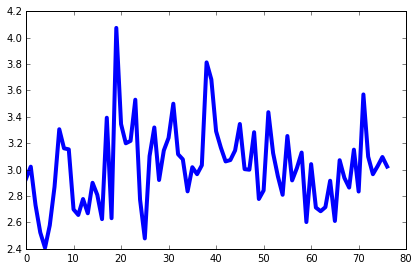

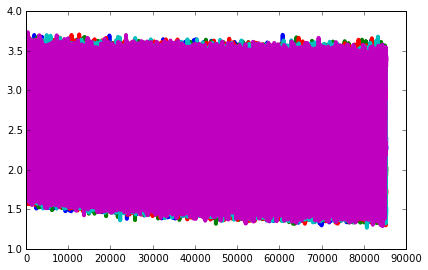

In [115]:
import cPickle
from scitool.propertie import Propertie
losses,val_losses = cPickle.load(open('losses12.pick',"rb"))


l = 20
l=39
l=77
nperiod = len(losses) / (5*l)
#nperiod=1000
print nperiod
nstep = 5
lossescat = [ [losses[nstep*l *period + l*start:nstep*l*period + l *start + l-1 ] \
               for period in range(nperiod) ] for start in range(nstep)]

plot(losses[:l])
figure()
for i in range(nstep):
    top = Propertie(np.concatenate(lossescat[i])).smooth(10)
    plot(top)
    print i,Propertie(np.concatenate(lossescat[i])).smooth(4*l)[-1]
    
#xlim(1000,None)
#ylim(None,1.7)

In [46]:
import theano as K
def visualisation(model,inputs,name="reversed"):

    get_conv_layer_output = K.function([model.inputs[i].input for i in model.input_order],
                                   [model.nodes[name].get_output(train=False)])
    conv_output = get_conv_layer_output([inputs[i] for i in model.input_order])[0]
    
    return conv_output

In [77]:
graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_withnoise_16_138")
#graph4p.load_weights("paper_sub_simple=False,diff_sigma=2.0,delta_sigma_directed=6.,ndim=2,anisentropy=0.1,deltav=.4,rho_fixed=False,random_rotation=False_8_42")
#r = visualisation(graph8,{"input1":np.array([t for t in Normed[5]],dtype=np.float32)},name="1allmost")

In [68]:
ModelN,Model_num,s,sc1,real_traj1,norm,alpha2 = generate_traj(size,lower_selfprob=0.4,
                                                                   fight=False,diff_sigma=1,
                                                                    deltav=0.1,zeros=False,
                                                                    delta_sigma_directed=6,
                                                                    force_model = 0,
                                                                    Ra0=[],Mu0=[],sub=True,anisentropy=0)
print sc1
ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,lower_selfprob=0.9,
                                                                   fight=False,diff_sigma=1,
                                                                    deltav=0.1,zeros=False,
                                                                    delta_sigma_directed=6,
                                                                    force_model = 2,
                                                                    Ra0=[],Mu0=[],sub=True,anisentropy=0)
                        
print sc

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [78]:
from  Tools import generate_traj,random_rot,traj_to_dist
what = 8
#input1 = np.array([t for t in Normed[what]],dtype=np.float32)
inputs = []
ress = []
size=50


            
real_traj1  = random_rot(real_traj1,0.1)
            
alligned_traj,normed1,alpha,_ = traj_to_dist(real_traj1[::,:2])
res1 = np.zeros((size,10))
res1[range(size),np.array(sc1,dtype=np.int)] = 1

input1  =  np.array([t for t in normed1],dtype=np.float32)
inputs.append(input1)
ress.append(res1)

#Second



real_traj  = random_rot(real_traj,0.1)
            
alligned_traj,normed,alpha,_ = traj_to_dist(real_traj[::,:2])
res = np.zeros((size,10))
res[range(size),np.array(sc,dtype=np.int)] = 1

input1  =  np.array([t for t in normed],dtype=np.float32)
inputs.append(input1)
ress.append(res)

toplot = {}

for names in ["input1","l1","l2","l3","l4","output0","cat"]:
    toplot[names] = []

    for input1,res in zip(inputs,ress):
        if names == "input1":
            toplot[names].append(input1.T)
        elif names == "cat":
            #toplot.append(Y_tests[what].T)
            toplot[names].append(res.T)
        else:
            toplot[names].append( visualisation(graph4p,{"input1":input1},name=names)[0].T)

In [49]:
print M0

['D', 'Dv', 'D-D', 'D-DvL', 'DvR-DvL', 'D-D-D', 'D-D-DvL', 'D-DvL-DvR', 'DvL-DvR-DvR1', 'D-D-DvL-DvR', 'D-DvL-DvR-DvR1', 'D-D-DvL-DvR-DvR1']


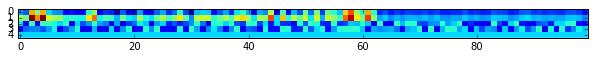

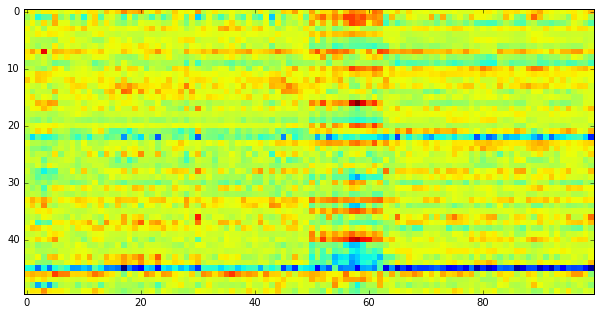

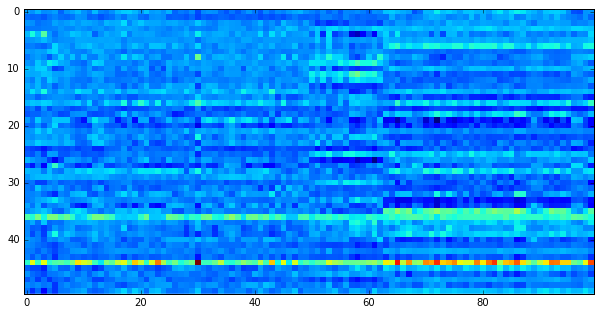

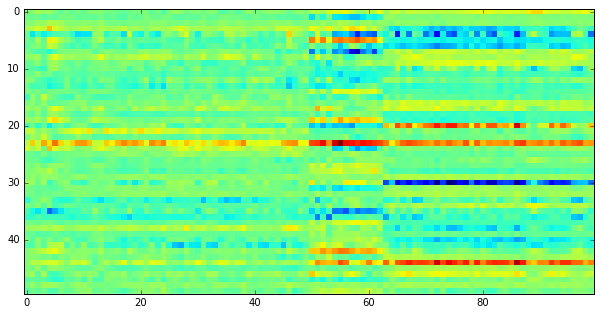

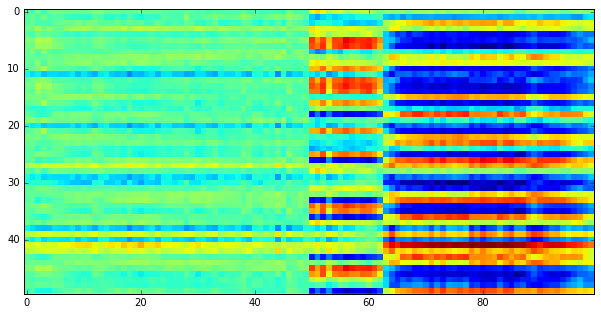

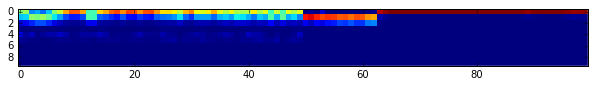

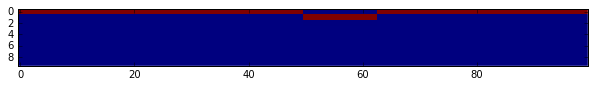

In [79]:
for names in ["input1","l1","l2","l3","l4","output0","cat"]:
#for names in ["input1","output0","cat"]:
    figure(figsize=(9,5))
    imshow(np.concatenate(toplot[names],axis=1),interpolation="None")
    

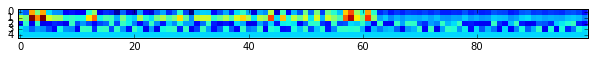

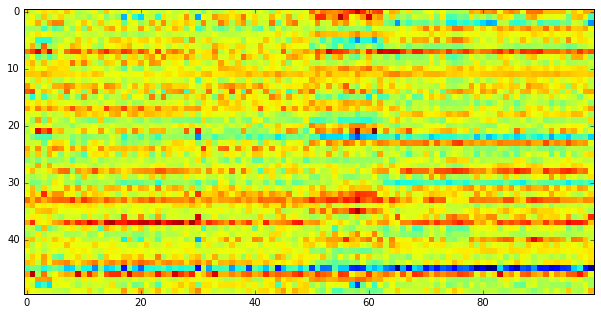

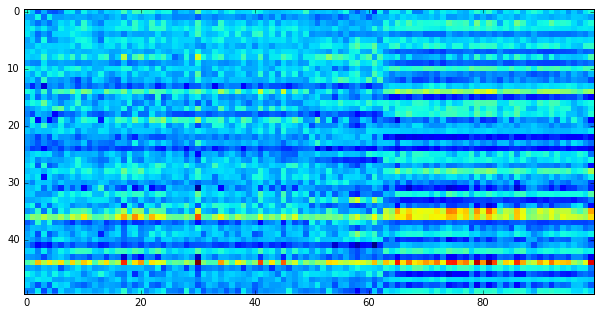

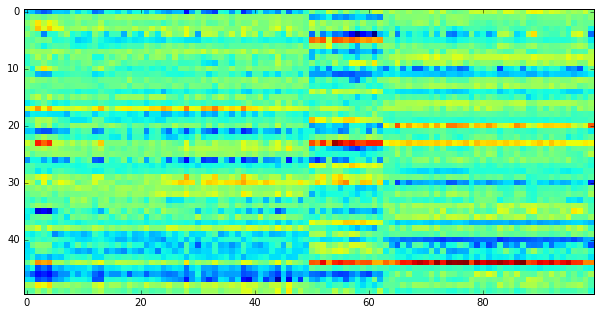

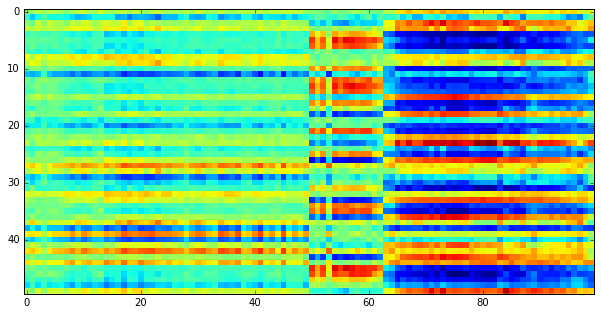

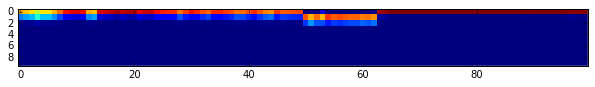

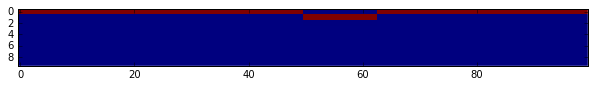

In [76]:
for names in ["input1","l1","l2","l3","l4","output0","cat"]:
#for names in ["input1","output0","cat"]:
    figure(figsize=(9,5))
    imshow(np.concatenate(toplot[names],axis=1),interpolation="None")
    

In [61]:
toplot = [(itoplot -itoplot.min())/(itoplot.max()-itoplot.min()) for itoplot in toplot]
print toplot[0].shape,toplot[1].shape
imshow(np.concatenate(toplot,axis=0))

AttributeError: 'str' object has no attribute 'min'

(5, 50) (10, 50)


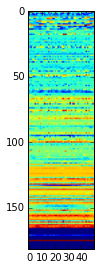

In [736]:
toplot = [(itoplot -itoplot.min())/(itoplot.max()-itoplot.min()) for itoplot in toplot]
print toplot[0].shape,toplot[1].shape
imshow(np.concatenate(toplot,axis=0))

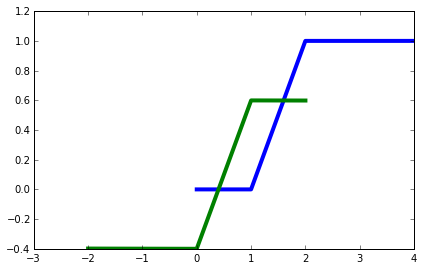

In [349]:
def random_rot(traj,alpha):
    
    axis = [[np.cos(-alpha),np.cos(-alpha+3.14/2)],
           [np.sin(-alpha),np.sin(-alpha+3.14/2)]]
    
    axis=np.array(axis)
    

    newtraj =  (traj-mean(traj.T,axis=1)).T 

    return dot(axis.T,newtraj).T

init = np.array([[0,0],[1,0],[2,1],[3,1],[4,1]])
plot(init[::,0],init[::,1])
new = random_rot(init,3.14)
plot(new[::,0],new[::,1])

 0 nan
1 nan
2 nan
3 nan
4 nan


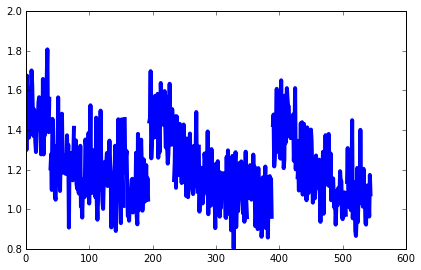

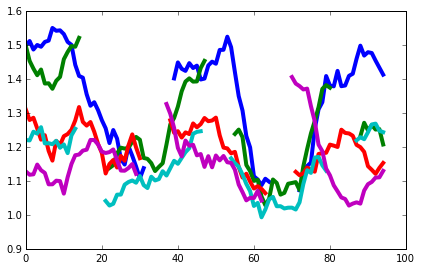

In [325]:
import cPickle
losses,val_losses = cPickle.load(open('losses4.pickle',"rb"))

nperiod = len(losses) / 100
lossescat = [ [losses[100 *period + 20*start:100*period + 20 *start + 19 ] \
               for period in range(nperiod) ] for start in range(5)]
plot(losses)
figure()
for i in range(5):
    top = Propertie(np.concatenate(lossescat[i])).smooth(4)
    plot(top)
    print i, Propertie(np.concatenate(lossescat[i])).smooth(3*25)[-1]


#Separation random v

0 3
1 4
2 5
3 6


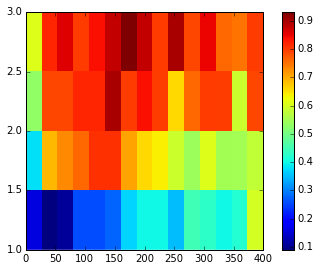

In [168]:
import numpy as np
import pylab as plt
from Tools import generate_traj,random_rot,traj_to_dist


range_mu = np.arange(3,7,1)
#range_mu = []
range_len = range(25,400,25)#[400]
maxlen = 400
ndim = 2
#rangemu=[3]
res = np.zeros((len(range_mu),3+12))
for Mu,mu in enumerate(range_mu):
    print Mu,mu
    Nt = 100
  

    
    
    for Lenght,l in enumerate(range_len):
        if l %2 == 1:
                l = l- 1
                
        Traj = []
        Real_traj = []
        S = []
        for n in range(Nt):
            size = l
            Ra0 = [0,1.]
            succeed = False
            g = 0
            while not succeed or g > 10:
                try:
                    #print "gen"
                    g += 1
                    ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,lower_selfprob=0.9,
                                                                                fight=False,diff_sigma=2,
                                                                                deltav=0.1,zeros=False,
                                                                                delta_sigma_directed=0.1,
                                                                                force_model = 4,
                                                                                anisentropy = 0,
                                                                                Mu1=[[mu,0],[1/2.,1/2.],[0]],
                                                                                Mu0=[[2,0],[1/2.,1/2.],[0]],
                                                                                ndim=ndim)
                    if Model_num == 4:
                        break


                except IndexError:
                    print "Failed"
                    succeed = False

            #R = get_parameters(real_traj,s,1,1,2)
            #print R[0][2][1] ,  R[1][2] [0]
            alpharot = 2*3.14*np.random.random()

            real_traj2  = random_rot(real_traj,alpharot,ndim=ndim)

            alligned_traj,normed,alpha,_ = traj_to_dist(real_traj2[::,:ndim],ndim=ndim)

            Traj.append(normed)

            Real_traj.append(real_traj2)
            S.append(s)



        #print np.array(Traj).shape,np.array(Traj)[::,:l,::].shape
        res1 = graph7.predict({"input1":np.array(Traj)[::,:l,::]})
        cat = res1["category"]

        res[Mu,Lenght] = np.sum(np.argmax(cat,-1) == [4]) / 1.0 / Nt

if plot:
    #,cmap=plt.get_cmap("cool")
    plt.imshow(res[::-1,::],interpolation="None",extent=(0,400,1,3),aspect=200)
    plt.colorbar()
    plt.savefig("separation-unfilterer.png")



In [ ]:
print S[0]
print np.argmax(cat,axis=-1)
trajs=Real_traj
pred_RNN = res1["output"]
pred_RNN_cat = res1["category"]
print pred_RNN.shape

0 1.0 1 1.2 2 1.4 3 1.6 4 1.8 5 2.0 6 2.2 7 2.4 8 2.6 9 2.8 10 3.0


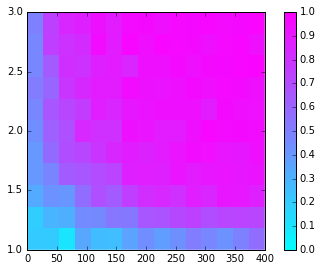

In [27]:
from Automated_test import Brownian_V_separation
r = Brownian_V_separation(graph4p)

0 2
1 3
2 4
3 5
4 6
5 7
6 8
7 9


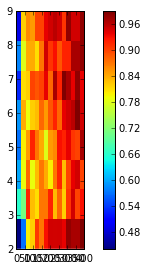

In [22]:
from Automated_test import Brownian_Brownian_separation
r = Brownian_Brownian_separation(graph7)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


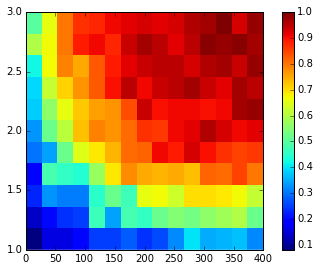

In [13]:
from Automated_test import Brownian_V_separation
r = Brownian_V_separation(graph7)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


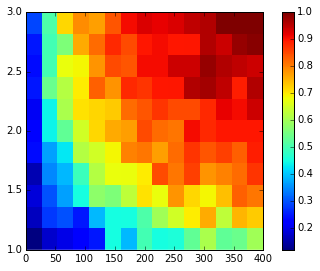

In [58]:
from Tools import generate_traj,random_rot,traj_to_dist
from Automated_test import Brownian_V_separation

graph9.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")
#graph9.load_weights("training_0separation_4_6")

r = Brownian_V_separation(graph9)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


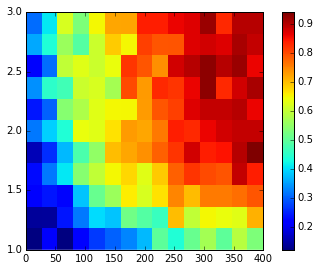

In [59]:
graph9.load_weights("saved_weights/three_bilayer_sub_bis")

r = Brownian_V_separation(graph9)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


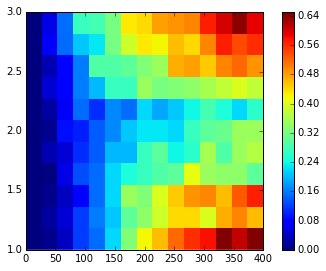

In [341]:
graph9.load_weights("training_1_separation_6_102")

r = Brownian_V_separation(graph9)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


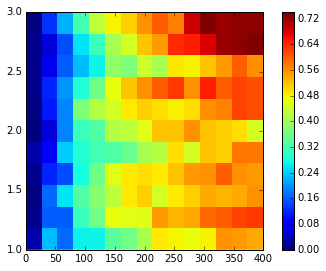

In [342]:
graph9.load_weights("saved_weights/three_layer_trained_on_no_sub_anisentropy0_diffsigma1_delta_sigma_directed3")

r = Brownian_V_separation(graph9)

0 1.0
1 1.2
2 1.4
3 1.6
4 1.8
5 2.0
6 2.2
7 2.4
8 2.6
9 2.8
10 3.0


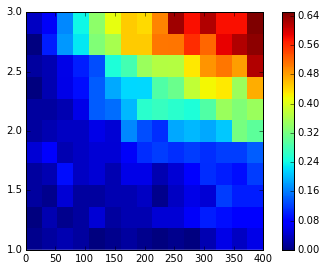

In [343]:
graph9.load_weights("saved_weights/three_bilayer_sub_bis")

r = Brownian_V_separation(graph9)

#Training range

In [98]:
from prePostTools import get_parameters
from Tools import generate_traj
data = {"s":[],"m":[],"sm":[],"sup":[]}
for i in range(5000):
    size=100
    force_model = 3
    """
    ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,lower_selfprob=0.9,
                                                                   fight=False,diff_sigma=2,
                                                                    deltav=0.1,zeros=False,
                                                                    delta_sigma_directed=0.1,
                                                                   force_model = 3,
                                                                    anisentropy=0,ndim=2)"""
    
    ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,sub=False,lower_selfprob=0.9,
                                                                clean=2,diff_sigma=2.0,
                                                                       delta_sigma_directed=0.5,ndim=2,
                                                                      anisentropy=0.0,deltav=0.4,
                                                                        force_model=force_model)
    
    clean = True
    ndim =2 
    ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=False,
                                                            clean=clean,diff_sigma=2.0,
                                                            delta_sigma_directed=6.,ndim=ndim,
                                                           force_model=force_model,
                                                            anisentropy=0.1,deltav=.4,rho_fixed=False,
                                                            random_rotation=False)
    Ra0 = [0,1/2.]
    mu=2
    ModelN,Model_num,s,sc,real_traj,norm,Z = generate_traj(size,sub=False,
                                                                       clean=clean,diff_sigma=2.0,
                                                                       delta_sigma_directed=6.,ndim=ndim,
                                                                      anisentropy=0.,deltav=.4,
                                                                       force_model = 3,
                                                                      Ra0=Ra0,Mu0=[[mu,0],[0.5*0.8,0.5*0.8],[0]],
                                                                      random_rotation=False)
    
    """    
    ModelN,Model_num,s,sc,real_traj,norm,alpha2 = generate_traj(size,lower_selfprob=0.9,
                                                                                    fight=False,diff_sigma=2,
                                                                                    deltav=0.1,zeros=False,
                                                                                    delta_sigma_directed=0.1,
                                                                                    force_model = 3,
                                                                                    anisentropy=0,
                                                                    Ra0=Ra0,Mu0=[[mu,0],[1,1],[0]],
                                                                                    ndim=ndim,fixed_self_proba=True)
    """
    R = get_parameters(real_traj,sc,1,1,2)
    
    if len(R) >= 2 and force_model == 3:
    #print R
        sigma = R[0][2][-1]
        absmu = abs(np.sum(R[1][2][0]**2))**0.5
        sigmamu = R[1][2][-1]
        data["s"].append(sigma)
        data["m"].append(absmu)
        data["sm"].append(sigmamu)
        data['sup'].append( absmu / sigma)
        
    if len(R) >= 2 and force_model == 2:
    #print R
        sigma = R[0][2][-1]
        absmu = abs(np.sum(R[1][2][0]**2))**0.5
        sigmamu = R[1][2][-1]
        data["s"].append(sigma)
        data["m"].append(absmu)
        data["sm"].append(sigmamu)
        data['sup'].append( absmu / sigma)
    #print sigma , absmu , absmu > sigma

In [75]:
for i in range(20):  
    Ra0 = []
    Ra1 = []
    scale = 1+9*random.random()
    
    
    
    cats = scale*np.random.random()
   
    diff_sigma=2
    #1.5
    
    if Ra0 == []:
        
        Ra0 = [0,cats]
    else:
        scale = 1
        
    
    
    if Ra1 == []:
        
        Ra1 = [0,max(diff_sigma*Ra0[1]+scale*np.random.random(),scale)]
    print Ra0,Ra1

[0, 0.4380694513583188] [0, 1.240427443554457]
[0, 1.6539241106211875] [0, 5.068294527500884]
[0, 2.175177249585642] [0, 6.539991590636774]
[0, 0.5766522848958218] [0, 2.655735148328719]
[0, 2.217948088072663] [0, 6.602964517590426]
[0, 0.5496911791409527] [0, 4.169852100212853]
[0, 1.7755682436428692] [0, 4.211023829826295]
[0, 3.8575947984425647] [0, 11.577122941717555]
[0, 6.349844534109178] [0, 14.540745703764896]
[0, 3.2664236405880835] [0, 8.201665195719219]
[0, 4.08666521890634] [0, 8.27888586756858]
[0, 4.4468836707336035] [0, 11.676434382478922]
[0, 0.18876614696924315] [0, 3.414499981725277]
[0, 4.602775779596193] [0, 11.720156665758736]
[0, 3.3442392472797793] [0, 9.942134387843605]
[0, 0.1872849387353221] [0, 8.66001594868488]
[0, 5.667380203138008] [0, 12.667790422268661]
[0, 2.0522907836309834] [0, 6.2697728701191]
[0, 6.13826424438162] [0, 13.504342927340229]
[0, 0.5369486278707385] [0, 1.1327781489131843]


D-D
1.04383360286


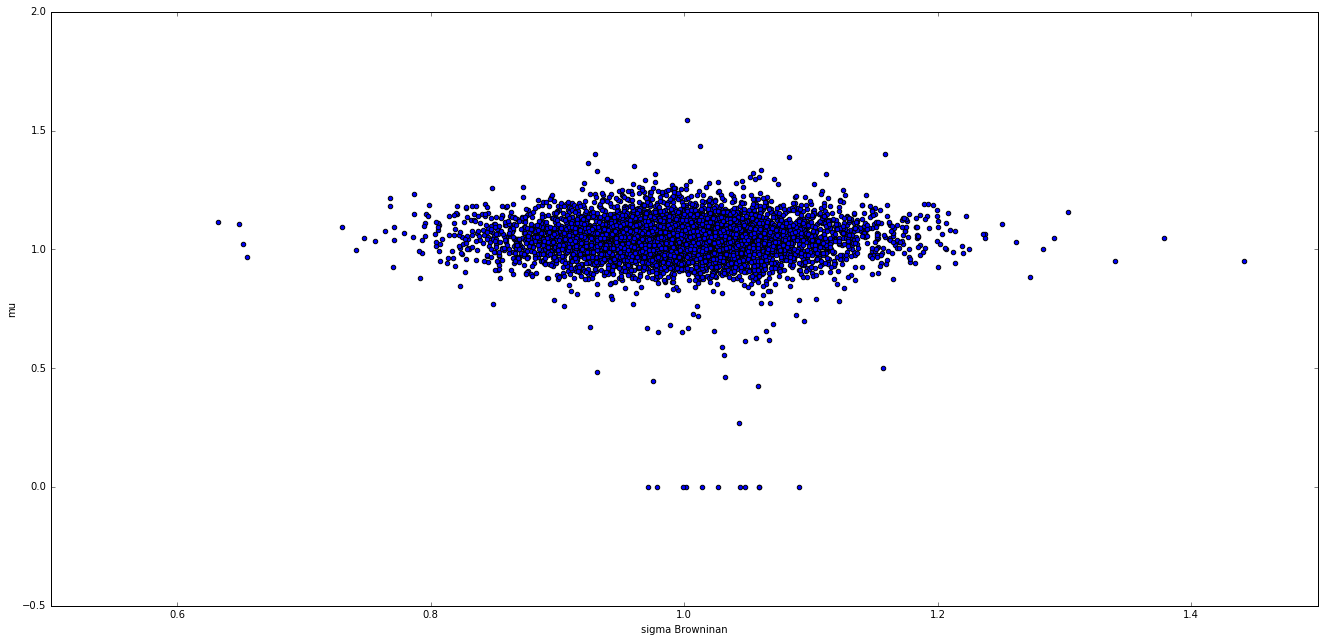

In [99]:
print  M0[2]
figure(figsize=(20,10))
scatter(np.array(data["s"]),np.array(data["sm"]))
xlabel("sigma Browninan")
ylabel("mu")
print np.mean(data["sm"])

#ylim(0,20)

D-D


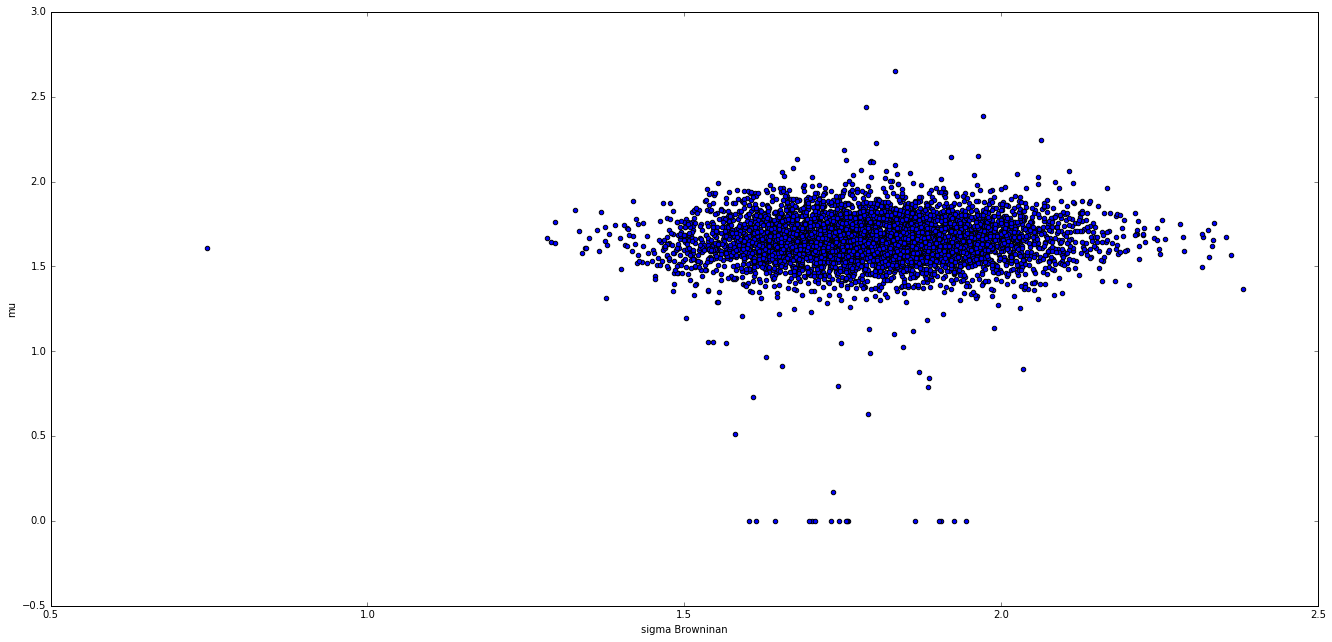

In [76]:
print  M0[2]
figure(figsize=(20,10))
scatter(np.array(data["s"]),np.array(data["sm"]))
xlabel("sigma Browninan")
ylabel("mu")
#xlim(0,20)
#ylim(0,20)

[[0.0, 71, [array([ 0.05628356,  0.02931512]), array([ 0.237385  ,  0.32763443]), 0.066800324983006157, 0.5169151767282758]], [1.0, 26, [array([-0.40926298,  0.63005375]), array([ 1.57212402,  2.29894112]), 3.3433702808690668, 3.656977047162898]], [9.0, 3, [array([-0.03180709, -0.57956611]), array([ 0.49985471,  0.40557252]), 0.11722833481715551, 0.6847724726276766]]]


(0, 20)

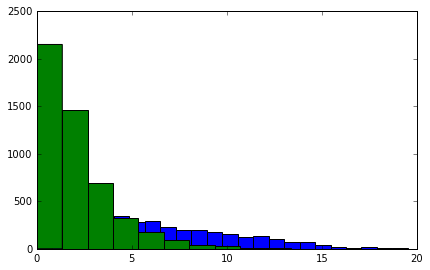

In [61]:
print R
#s= hist(np.array(data["s"])-np.array(data["sm"]),bins=30)
hist(np.array(data["s"]),bins=50)
h= hist(np.array(data["m"]),bins=50)
xlim(0,20)

0.0028180093278 0.0454160879834
0.0192182205137 1135.093064


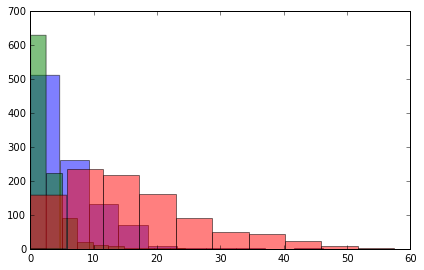

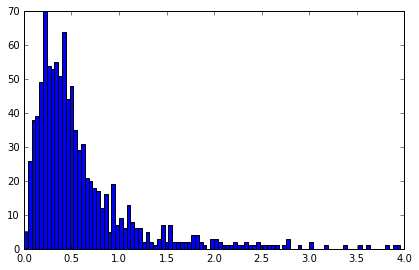

In [61]:
hist(data["s"],alpha=0.5)

hist(data["m"],alpha=0.5)

hist(data["sm"],alpha=0.5)


print min(data["s"]) , min(data["m"])
np.mean(data['sup'])
figure()
l=hist(data["sup"],bins=100,range=[0,4])
print min(data["sup"]) , max(data["sup"])

In [126]:
from prePostTools import get_parameters
w=20
R = get_parameters(Real_traj[w],S[w],1,1,2)
print R[0][2][1] ,  R[1][2] [0]


#np.argmax(cat,-1)
#t = Real_traj[-5]
#print t.shape
#plot(t[::,0],t[::,1])

[[0.0, 414, [array([ 0.02192141, -0.04338398]), array([ 1.15213166,  1.10484811]), 1.0109567282321354, 2.0109268790606341]], [3.0, 386, [array([-2.50356237, -1.4317401 ]), array([ 0.95012567,  0.95749493]), 0.71731220949350083, 1.6938857216394509]]]
[ 1.15213166  1.10484811] [-2.50356237 -1.4317401 ]


In [263]:
from pynote.Median import load_traj
root = "/home/jarbona/cluster/test-onep-freebis/" +\
"coarse_3750_khun_0p00_Vribo_0p14_cuttoff_1p15_etelo_4p00_ctelo_2p00_compaction_50_microtubule_0p30/"
S=2
r2,lic2,axe2 =  load_traj(root,S,what=range(1,1),n=4,axe=False)


/home/jarbona/cluster/test-onep-freebis/coarse_3750_khun_0p00_Vribo_0p14_cuttoff_1p15_etelo_4p00_ctelo_2p00_compaction_50_microtubule_0p30//traj1/ch12 New or empty


KeyboardInterrupt: 

['MeanSqHRMSDmid', 'MeanSqHRMSDmidInt', 'MSD4R', 'MSD13R', 'MSDURA3', 'HRMSDmidInt', 'MSDmidInt', 'MeanSqHRMSDmidMid', 'MSD16R', 'MSDmidMid', 'MinHRMSDmidInt', 'MinHRMSDmid', 'MinHRMSDcentroMid', 'MeanHRMSDmid', 'MeanHRMSDcentroMid', 'MinHRMSDmidMid', 'MeanSqHRMSDcentroMid', 'MaxHRMSDcentroMid', 'MSDcentro', 'MaxHRMSDmidInt', 'MaxHRMSDmid', 'MSDmid', 'MSD15R', 'MeanHRMSDmidInt', 'MeanHRMSDmidMid', 'MSD3L', 'MSDcentroInt', 'HRMSDcentroMid', 'HRMSDmidMid', 'MSD6R', 'MaxHRMSDmidMid', 'MSDcentroMid', 'HRMSDcentro', 'HRMSDcentroInt', 'HRMSDmid']
(8999,)


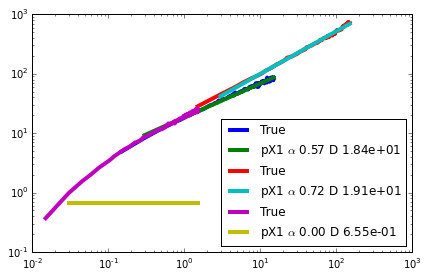

In [543]:
print [k for k in lic2[0] if "MSD" in k]
what = "Mid"
gene="mid"
s=1.5
print  lic2[0]["MeanHRMSD"+gene+what].shape

a = lic2[0].plot("MeanHRMSD"+gene+what,fit=True,end=100,legend="gene",divide=r2**2,shift= s/10,Break=100000,every=1,
                    toplot=True,label=True)
what = ""
a = lic2[0].plot("MeanHRMSD"+gene+what,fit=True,end=100,legend="gene",divide=r2**2,shift= s,Break=100000,every=1,
                    toplot=True,label=True)


what = "Int"
a = lic2[0].plot("MeanHRMSD"+gene+what,fit=True,end=100,legend="gene",divide=r2**2,shift= s/100,Break=100000,every=1,
                    toplot=True,label=True)

xscale("log")
yscale("log")
legend(loc="best")

In [45]:
import cPickle
ch=1
"""
print [ k for k in lic2[ch-1].keys() if "x" in k]
with open("/home/jarbona/Theano/subd_teloR","w" ) as f:
    gene = "MeancentroMid"
    x,y,z = lic2[ch-1]["x"+gene],lic2[ch-1]["y"+gene],lic2[ch-1]["z"+gene]
    print len(x)
    cPickle.dump([x,y,z],f)"""

NameError: name 'lic2' is not defined

In [30]:
print (x[1:]-x[:-1]).std(),(y[1:]-y[:-1]).std(),(z[1:]-z[:-1]).std()

2.81993390124 2.84521601881 2.82441133806


In [100]:
import scipy
data = {}
from scitool.propertie import Propertie
mat = scipy.io.loadmat('/home/jarbona/simunoyau/data/MSDs_global.mat', struct_as_record=False, squeeze_me=True)
print mat.keys()
data["4teloR"]=["2D",13,"teloR","teloR","Sebastien, pas d'induction, souche YEF798",[mat['deltaTs_med'],mat['MSDs_med4']]]
data["1teloRfast"]=["2D",13,"teloR","teloR","Sebastien, pas d'induction, souche YEF798",[mat['deltaTs_fast'],mat['MSDs_fast1']]]
data["1teloRmed"]=["2D",13,"teloR","teloR","Sebastien, pas d'induction, souche YEF798",[mat['deltaTs_med'],mat['MSDs_med1']]]
data["2teloRfast"]=["2D",13,"teloR","teloR","Sebastien, pas d'induction, souche YEF798",[mat['deltaTs_fast'],mat['MSDs_fast2']]]
data["2teloRmed"]=["2D",13,"teloR","teloR","Sebastien, pas d'induction, souche YEF798",[mat['deltaTs_med'],mat['MSDs_med2']]]
#print data["2teloRfast"]

['MSDs_med4', 'MSDs_fast1', 'MSDs_med1', 'deltaTs_fast', 'MSDs_med2', 'deltaTs_med', '__header__', '__globals__', 'MSDs_fast2', '__version__']
['2D', 13, 'teloR', 'teloR', "Sebastien, pas d'induction, souche YEF798", [array([  0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,   0.9,
         1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,   1.8,
         1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,   2.7,
         2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,   3.6,
         3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,   4.5,
         4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,   5.4,
         5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,   6.3,
         6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,   7.2,
         7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,   8.1,
         8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,   9. ,
         9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,   9.9,
        10. 

In [175]:
from Tools import get_parameters
i = 6
cat = clean(pred_RNN[i],np.argmax(pred_RNN_cat[i]),fight=False,sub=True)
print set(cat)
get_parameters(trajc["16R"][i][::,:2],cat,1,1)
print trajc["16R"][6]

set([6])


IndexError: index 39 is out of bounds for axis 0 with size 39

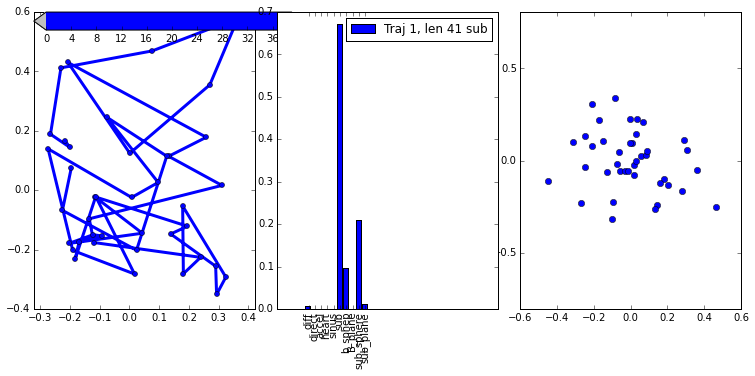

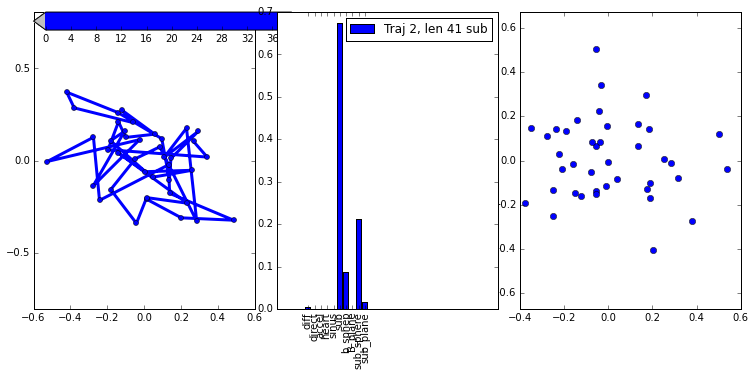

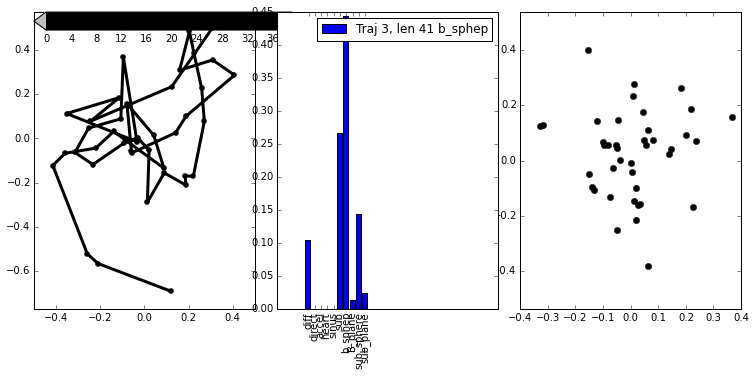

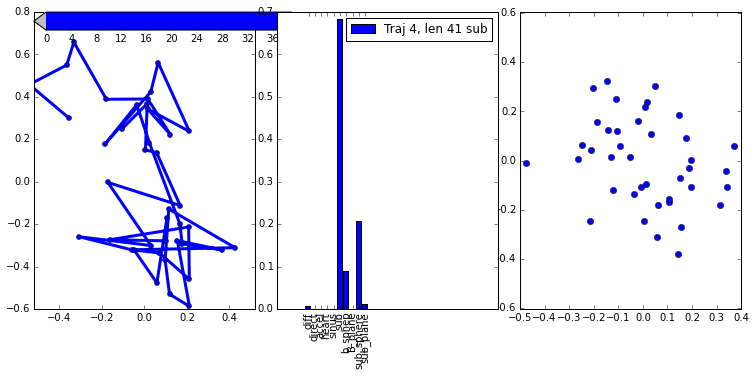

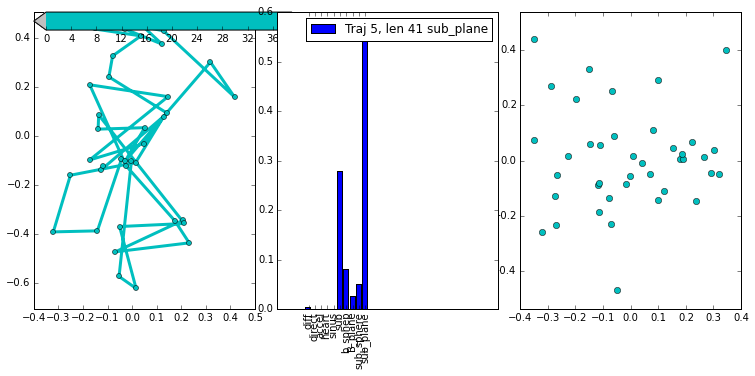

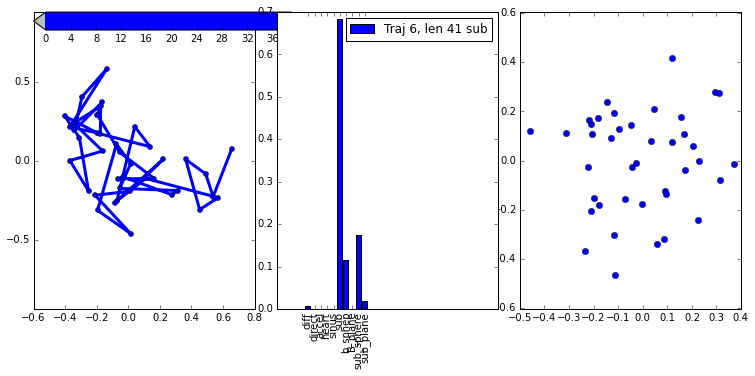

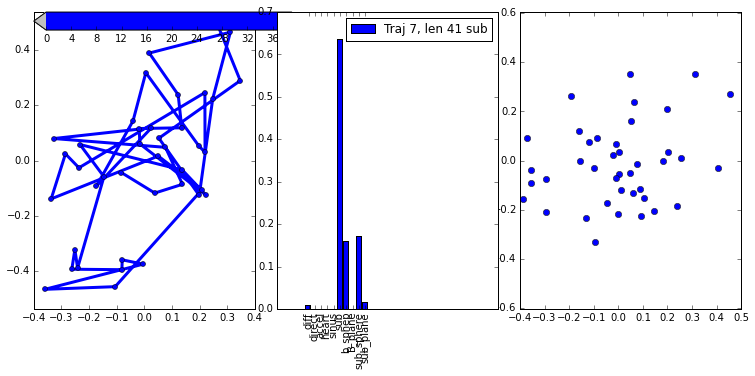

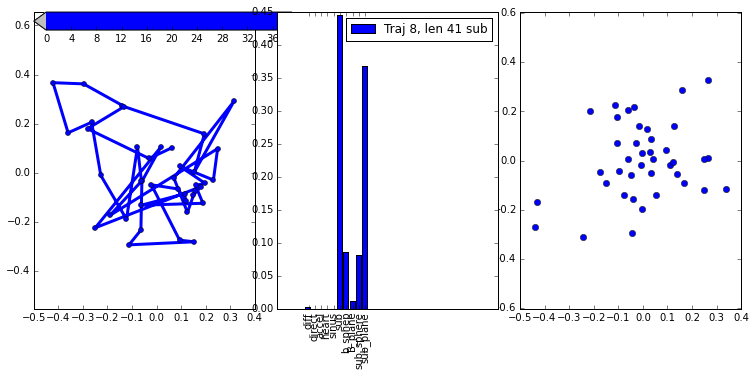

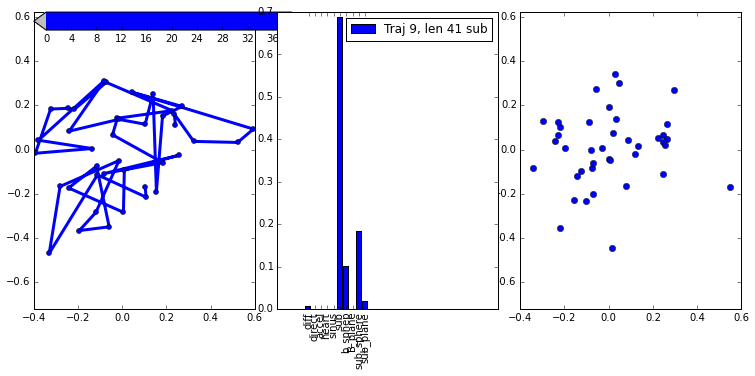

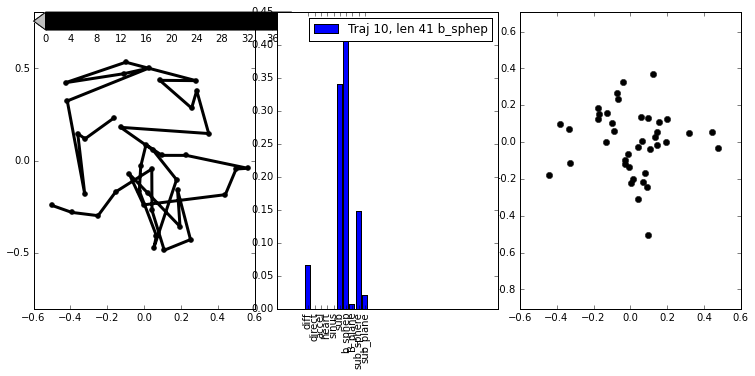

In [262]:
from Tools import get_step_class,plot_label,clean,Labels,M0,plot_by_class,clean,colors
#colors = {0:"b",1:"g",2:"r",3:"k",4:"y",5:"c",6:"m",7:"g"}
import matplotlib as mpl


ii=0
for traj,cat,mod in zip(trajs,pred_RNN,pred_RNN_cat):#[3:4]:
    
    #print ii
    ii += 1
    if ii > 10:
        break
    """
    if M3[np.argmax(mod[0])] != "sub_plane":
        continue"""
    
    scat = clean(cat,np.argmax(mod),fight=False,sub=True)
    #print len(scat),len(traj)
    fig = figure(figsize=(15,5))
  
    ax = fig.add_subplot(141)
    end = None
    #print traj.shape,scat.shape
    start = 0
    #print len(traj),len(scat)
    #print traj.shape
    plot_label(traj[start:end][1:],scat[start:end],remove6=9)
    
    #print scat[:5]
    
    axis("equal")
    
    scat_clean = scat # [iscat for iscat in scat if iscat != 6]
    cmap = mpl.colors.ListedColormap([colors[iinit] for iinit in scat_clean])
    cmap.set_over('0.25')
    cmap.set_under('0.75')
    ax3 = fig.add_axes([0.1, 0.9, 0.25, 0.05])

    # If a ListedColormap is used, the length of the bounds array must be
    # one greater than the length of the color list.  The bounds must be`
    # monotonically increasing.
    
    bounds=range(len(scat_clean))
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(ax3, cmap=cmap,
                                    norm=norm,
                                    # to use 'extend', you must
                                    # specify two extra boundaries:
                                    #boundaries=[0] + bounds + [13],
                                    extend='both',
                                   
                                    spacing='proportional',
                                    orientation='horizontal')
    
    ax = fig.add_subplot(143)
    plot_by_class(traj[:][start:end],scat[start:end])
    
    axis("equal")
    """
    ax = fig.add_subplot(144)
    plot_by_class(traj[start:end,:],S[ii][start:end])
    axis("equal")
    """
    ax = fig.add_subplot(142)
    lcat= len(mod[0])
    bar(np.arange(lcat)-0.5,mod[0],label="Traj %i, len %i %s"%(ii,len(traj),M3[np.argmax(mod[0])]))
    plt.xticks(range(len(M3)), M3,rotation=90)
   
    legend()
    
show()

In [34]:
#sudo mount -t cifs //157.99.40.175/nucloc /home/jarbona/atlas_smb -o username=jarbona,workgroup=WORKGROUP,rw,hard,nosetuids,noperm
from scipy.io import loadmat
import copy
rep = [["../atlas_smb/ptherizo/pour tarn/dyn_4R15R_nucloc_output_631cells_suppl.mat",["4R","15R"]]] #Mean 0.91
rep += [["../atlas_smb/ptherizo/pour tarn/4R13R_dyn_nucloc_output_641cells_suppl.mat",["4R","13R"]]] # Mean 0.92
rep += [["../atlas_smb/ptherizo/pour tarn/dyn_16R_URA3_nucloc_output_599cells_suppl.mat",["16R","URA3"]]] #Mean 0.99
rep += [["../atlas_smb/shared/A_LOCI/Telomeres/Dynamic/6R3L/nucloc_output_1176cells_suppl.mat",["6R","3L"]]]
rep +=[["../atlas_smb/shared/A_LOCI/Telomeres/Dynamic/6R4R/nucloc_output_438cells_suppl.mat",["6R","4R"]]]
DataTMean = []
DataTMeanp = []
DatapInte = []
DataT = []
traj = {}
for R,[ch1,ch2] in rep:
    if not traj.has_key(ch1):
        traj[ch1] = []
    if not traj.has_key(ch2):
        traj[ch2] = []
    
    r = loadmat(R,struct_as_record=False, squeeze_me=True)
    xr = np.arange(0.03,1.,0.03)

    #print DatapInte
    
    for j in range(len(r['output'])):
        a = r['output'][j]
        d = [ np.sqrt(  (a[i].xgene - a[i].xgene_ch2)**2 + \
                       (a[i].ygene - a[i].ygene_ch2)**2 + \
                      (a[i].zgene - a[i].zgene_ch2)**2)  for i in range(40)]
        traj[ch1].append( np.array([ [a[i].xgene ,a[i].ygene ,a[i].zgene] for i in range(40)]))
        traj[ch2].append(np.array([ [a[i].xgene_ch2 ,a[i].ygene_ch2 ,a[i].zgene_ch2] for i in range(40)]))
        #plot(d)
     
    #plot(xr,Tmean,label=str(np.mean(T)))
#print a[0].dx
#plot(r['output'].T)
trajc = copy.deepcopy(traj)

In [228]:
#graph3D.load_weights("transition_dim3_6_96_diff_size_50")
graph3.load_weights("pure_miss_9_88")

(array([   1.,  158.,  838.,  991.,  969.,  896.,  741.,  637.,  869.,  870.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

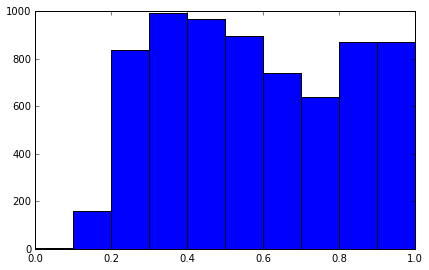

In [260]:
hist(totp,range=[0,1])

(array([    0.,    37.,   586.,   828.,   818.,   762.,   772.,   872.,
          815.,  1480.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

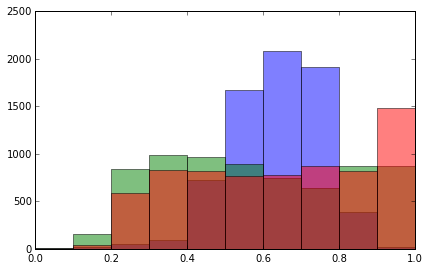

In [275]:
#top2D = totp.copy()
hist(top2,range=[0,1],alpha=0.5)
hist(top2D,range=[0,1],alpha=0.5)
hist(totp,range=[0,1],alpha=0.5)

[12]


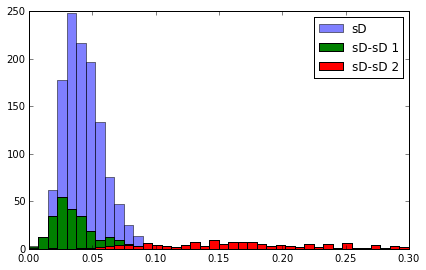

In [67]:
print np.argmax(c,-1)
k = "4R"
r = hist(D[k][12],range=[0,0.3],bins=40,alpha=0.5,label="sD")

hist(D[k][6],range=[0,0.3],bins=40,label="sD-sD 1")
r = hist(D[k][7],range=[0,0.3],bins=40,label="sD-sD 2")
legend()


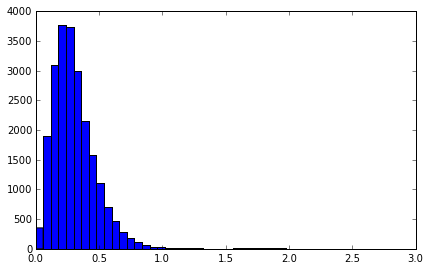

In [40]:
W = np.concatenate(Deltas)
r=hist(W**0.5,range=[0,3],bins=50)

In [202]:
chrlen=[230218,
        813184,
        316620,
        1531933,
        576874,
        270161,
        1090940,
        562643,
        439888,
        745751,
        666816,
        1078177,
        924431,
        784333,
        1091291,
        948066 ]
        
chrcen=[
        151465,
        238207,
        114385,
        449711,
        151987,
        148510,
        496920,
        105586,
        355629,
        436307,
        440129,
        150828,
        268031,
        628758,
        326584,
        555957]

#4 R  216
#15 R 152
#13 R  131
#16R 78
#6 R   24
#3 L   22
for i,(l,c) in enumerate(zip(chrlen,chrcen)):
    print i+1 , c/5000 , (l-c) / 5000

1 30 15
2 47 114
3 22 40
4 89 216
5 30 84
6 29 24
7 99 118
8 21 91
9 71 16
10 87 61
11 88 45
12 30 185
13 53 131
14 125 31
15 65 152
16 111 78
